# Deliverable 3: Optimize the Model

## Exploratory Optimization

### Increasing Epochs from 100 to 200

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()
# Target: IS_SUCCESSFUL
# Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION,
#           USE_CASE, ORGANIZATION, STATUS, INCOME_AMT,
#           SPECIAL_CONSIDERATIONS, ASK_AMT

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

In [3]:
# Bucket APPLICATION_TYPE
application_counts = application_df["APPLICATION_TYPE"].value_counts()

# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket CLASSIFICATION
classification_counts = application_df["CLASSIFICATION"].value_counts()

# Determine which values to replace if counts are less than 1800
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [4]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn_inc_epochs = tf.keras.models.Sequential()

# First hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_inc_epochs.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_inc_epochs.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model
nn_inc_epochs.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Increasing number of epochs
fit_model_inc_epochs = nn_inc_epochs.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 1s 627us/step - loss: 0.5879 - accuracy: 0.7107
Epoch 2/200
804/804 [==============================] - 1s 626us/step - loss: 0.5590 - accuracy: 0.7263
Epoch 3/200
804/804 [==============================] - 1s 640us/step - loss: 0.5547 - accuracy: 0.7294
Epoch 4/200
804/804 [==============================] - 1s 623us/step - loss: 0.5491 - accuracy: 0.7349
Epoch 5/200
804/804 [==============================] - 0s 621us/step - loss: 0.5520 - accuracy: 0.7290
Epoch 6/200
804/804 [==============================] - 1s 640us/step - loss: 0.5473 - accuracy: 0.7342
Epoch 7/200
804/804 [==============================] - 1s 623us/step - loss: 0.5473 - accuracy: 0.7321
Epoch 8/200
804/804 [==============================] - 1s 628us/step - loss: 0.5428 - accuracy: 0.7367
Epoch 9/200
804/804 [==============================] - 1s 624us/step - loss: 0.5489 - accuracy: 0.7318
Epoch 10/200
804/804 [==============================] - 1s 627us/step - l

804/804 [==============================] - 1s 644us/step - loss: 0.5353 - accuracy: 0.7399
Epoch 80/200
804/804 [==============================] - 1s 645us/step - loss: 0.5331 - accuracy: 0.7407
Epoch 81/200
804/804 [==============================] - 1s 643us/step - loss: 0.5367 - accuracy: 0.7356
Epoch 82/200
804/804 [==============================] - 1s 624us/step - loss: 0.5324 - accuracy: 0.7424
Epoch 83/200
804/804 [==============================] - 1s 623us/step - loss: 0.5320 - accuracy: 0.7418
Epoch 84/200
804/804 [==============================] - 1s 624us/step - loss: 0.5333 - accuracy: 0.7446
Epoch 85/200
804/804 [==============================] - 1s 625us/step - loss: 0.5345 - accuracy: 0.7396
Epoch 86/200
804/804 [==============================] - 1s 629us/step - loss: 0.5311 - accuracy: 0.7427
Epoch 87/200
804/804 [==============================] - 1s 648us/step - loss: 0.5321 - accuracy: 0.7434
Epoch 88/200
804/804 [==============================] - 1s 658us/step - loss:

804/804 [==============================] - 1s 647us/step - loss: 0.5316 - accuracy: 0.7413
Epoch 158/200
804/804 [==============================] - 1s 635us/step - loss: 0.5346 - accuracy: 0.7428
Epoch 159/200
804/804 [==============================] - 1s 646us/step - loss: 0.5331 - accuracy: 0.7408
Epoch 160/200
804/804 [==============================] - 1s 642us/step - loss: 0.5229 - accuracy: 0.7489
Epoch 161/200
804/804 [==============================] - 1s 640us/step - loss: 0.5315 - accuracy: 0.7437
Epoch 162/200
804/804 [==============================] - 1s 645us/step - loss: 0.5284 - accuracy: 0.7437
Epoch 163/200
804/804 [==============================] - 1s 644us/step - loss: 0.5286 - accuracy: 0.7454
Epoch 164/200
804/804 [==============================] - 1s 643us/step - loss: 0.5274 - accuracy: 0.7435
Epoch 165/200
804/804 [==============================] - 1s 647us/step - loss: 0.5287 - accuracy: 0.7475
Epoch 166/200
804/804 [==============================] - 1s 647us/ste

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_inc_epochs.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5818 - accuracy: 0.7279
Loss: 0.5818201899528503, Accuracy: 0.7279300093650818


### Changing activation function from `relu` to `tanh`

In [25]:
# Changing Activation Function: try tanh to handle negative inputs in X_train_scaled
nn_tanh = tf.keras.models.Sequential()

# First hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_tanh.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn_tanh.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
fit_model_tanh = nn_tanh.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 650us/step - loss: 0.5864 - accuracy: 0.7078
Epoch 2/100
804/804 [==============================] - 1s 636us/step - loss: 0.5558 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 1s 656us/step - loss: 0.5571 - accuracy: 0.7265
Epoch 4/100
804/804 [==============================] - 1s 641us/step - loss: 0.5572 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 1s 636us/step - loss: 0.5514 - accuracy: 0.7275
Epoch 6/100
804/804 [==============================] - 1s 637us/step - loss: 0.5477 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 629us/step - loss: 0.5504 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 1s 634us/step - loss: 0.5446 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] - 1s 624us/step - loss: 0.5444 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 1s 655us/step - l

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_tanh.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7341
Loss: 0.5568726062774658, Accuracy: 0.7341107726097107


### Reducing Number of Input Features with additional binning and removing redundant columns

In [167]:
# Reducing Number of Input Features
# "SPECIAL_CONSIDERATIONS_N" and "SPECIAL_CONSIDERATIONS_Y" are dedundant, drop "SPECIAL_CONSIDERATIONS_N"
# Bin categorical columns with more than 5 unique values
# Re-read data
application_df = pd.read_csv("Resources/charity_data.csv")

In [168]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bucket "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bucket "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [169]:
# Look at INCOME_AMT value counts for bucketing
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [170]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure bucketing was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [171]:
# Look at AFFILIATION value counts for bucketing
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [172]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure bucketing was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [173]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)

In [174]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)

In [175]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [176]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [177]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [178]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 80)                2800      
_________________________________________________________________
dense_433 (Dense)            (None, 30)                2430      
_________________________________________________________________
dense_434 (Dense)            (None, 1)                 31        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [179]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 643us/step - loss: 0.6063 - accuracy: 0.6930
Epoch 2/100
804/804 [==============================] - 1s 651us/step - loss: 0.5595 - accuracy: 0.7273
Epoch 3/100
804/804 [==============================] - 1s 649us/step - loss: 0.5588 - accuracy: 0.7246
Epoch 4/100
804/804 [==============================] - 1s 655us/step - loss: 0.5587 - accuracy: 0.7255
Epoch 5/100
804/804 [==============================] - 1s 644us/step - loss: 0.5504 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 1s 638us/step - loss: 0.5483 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 1s 639us/step - loss: 0.5516 - accuracy: 0.7295
Epoch 8/100
804/804 [==============================] - 1s 638us/step - loss: 0.5563 - accuracy: 0.7265
Epoch 9/100
804/804 [==============================] - 1s 643us/step - loss: 0.5538 - accuracy: 0.7225
Epoch 10/100
804/804 [==============================] - 1s 636us/step - l

In [180]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5551 - accuracy: 0.7286
Loss: 0.5551137328147888, Accuracy: 0.7286297082901001


## Systematic Optimzation
Following https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345 as guide.

### Parameters of Interest (Base Example)
- Number of hidden Layers/Nodes per Layer - specified as list of nodes ([80, 30])
- Activation function (`relu`)
- `learning_rate` (0.001)
- epochs (100)
- Bin Categorical Variables (True)

### Plan
- Create function that builds, trains, and tests model with parameters above as inputs and returns testing accuracy
- Vary each parameter above while keeping others constant at base value
- Naive solution: Take parameters generating highest testing accuracy and combine into super model

In [44]:
# Helper function to bin specified categorical columns with value counts less than min_count
def bin_cat_col(df, column, min_count):
    counts = df[column].value_counts()
    to_replace = list(counts[counts < min_count].index)
    for rep in to_replace:
        df[col] = df[col].replace(rep, "Other")

In [63]:
# Helper function to print results
def print_results(param_choice, input_vals, results):
    print(param_choice)
    for i in range(len(input_vals)):
        print(input_vals[i])
        print("Model Loss:", results[i][0])
        print("Model Accuracy:", results[i][1])
        print("")

In [151]:
# Function to build, train, and test neural network model with specified parameters
def build_train_test(architecture=(80, 30), activation="relu",
                     learning_rate=0.001, epochs=100, cat_cutoffs={},
                     batch_size=None):
    # Read Data
    application_df = pd.read_csv("Resources/charity_data.csv")
    application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

    # Preprocess Data
    # Check for bucketing categorical columns
    if len(cat_cutoffs) > 0:
        for col in cat_cutoffs:
            bin_cat_col(application_df, col, cat_cutoffs[col])

    # Encode Categorical columns
    # Generate our categorical variable lists
    application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
    # Create a OneHotEncoder instance
    enc = OneHotEncoder(sparse=False)
    # Fit and transform the OneHotEncoder using the categorical variable list
    encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
    # Add the encoded variable names to the dataframe
    encode_df.columns = enc.get_feature_names(application_cat)
    # Merge one-hot encoded features and drop the originals
    application_df = application_df.merge(encode_df, left_index=True, right_index=True)
    application_df = application_df.drop(labels=application_cat, axis=1)

    # Drop "SPECIAL_CONSIDERATION_N":
    application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)

    # Split our preprocessed data into our features and target arrays
    y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
    X = application_df.drop("IS_SUCCESSFUL", axis=1).values
    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # Create a StandardScaler instances
    scaler = StandardScaler()
    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)
    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # Define the model
    number_input_features = len(X_train_scaled[0])
    nn = tf.keras.models.Sequential()
    # Input layer and first hidden layer specified in `architecture`
    nn.add(tf.keras.layers.Dense(units=architecture[0], input_dim=number_input_features, activation=activation))

    if len(architecture) > 1:
        # Remaining hidden layers specified in `architecture`
        for i in range(1, len(architecture)):
            nn.add(tf.keras.layers.Dense(units=architecture[i], activation=activation))
    # Output layer
    nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    nn.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])

    # Train the model
    fit_model = nn.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs)
    
    # Evaluate the model using the test data
    model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
    return (model_loss, model_accuracy)

### Vary Epochs

In [58]:
training_epochs = [50, 100, 200, 300]
results = []
for te in training_epochs:
    result = build_train_test(epochs=te)
    results.append(result)

Epoch 1/50
804/804 [==============================] - 1s 933us/step - loss: 0.5912 - accuracy: 0.7058
Epoch 2/50
804/804 [==============================] - 1s 673us/step - loss: 0.5475 - accuracy: 0.7321
Epoch 3/50
804/804 [==============================] - 1s 646us/step - loss: 0.5505 - accuracy: 0.7290
Epoch 4/50
804/804 [==============================] - 1s 648us/step - loss: 0.5471 - accuracy: 0.7347
Epoch 5/50
804/804 [==============================] - 1s 650us/step - loss: 0.5398 - accuracy: 0.7388
Epoch 6/50
804/804 [==============================] - 1s 652us/step - loss: 0.5394 - accuracy: 0.7347
Epoch 7/50
804/804 [==============================] - 1s 646us/step - loss: 0.5432 - accuracy: 0.7319
Epoch 8/50
804/804 [==============================] - 1s 656us/step - loss: 0.5411 - accuracy: 0.7343
Epoch 9/50
804/804 [==============================] - 1s 695us/step - loss: 0.5409 - accuracy: 0.7313
Epoch 10/50
804/804 [==============================] - 1s 693us/step - loss: 0.538

Epoch 30/100
804/804 [==============================] - 1s 662us/step - loss: 0.5326 - accuracy: 0.7405
Epoch 31/100
804/804 [==============================] - 1s 672us/step - loss: 0.5311 - accuracy: 0.7447
Epoch 32/100
804/804 [==============================] - 1s 664us/step - loss: 0.5314 - accuracy: 0.7412
Epoch 33/100
804/804 [==============================] - 1s 666us/step - loss: 0.5309 - accuracy: 0.7443
Epoch 34/100
804/804 [==============================] - 1s 671us/step - loss: 0.5346 - accuracy: 0.7375
Epoch 35/100
804/804 [==============================] - 1s 662us/step - loss: 0.5323 - accuracy: 0.7398
Epoch 36/100
804/804 [==============================] - 1s 667us/step - loss: 0.5295 - accuracy: 0.7460
Epoch 37/100
804/804 [==============================] - 1s 666us/step - loss: 0.5372 - accuracy: 0.7350
Epoch 38/100
804/804 [==============================] - 1s 663us/step - loss: 0.5259 - accuracy: 0.7452
Epoch 39/100
804/804 [==============================] - 1s 665us

804/804 [==============================] - 1s 649us/step - loss: 0.5256 - accuracy: 0.7451
Epoch 87/200
804/804 [==============================] - 1s 645us/step - loss: 0.5312 - accuracy: 0.7412
Epoch 88/200
804/804 [==============================] - 1s 642us/step - loss: 0.5234 - accuracy: 0.7468
Epoch 89/200
804/804 [==============================] - 1s 644us/step - loss: 0.5262 - accuracy: 0.7442
Epoch 90/200
804/804 [==============================] - 1s 650us/step - loss: 0.5274 - accuracy: 0.7429
Epoch 91/200
804/804 [==============================] - 1s 644us/step - loss: 0.5285 - accuracy: 0.7388
Epoch 92/200
804/804 [==============================] - 1s 643us/step - loss: 0.5326 - accuracy: 0.7390
Epoch 93/200
804/804 [==============================] - 1s 642us/step - loss: 0.5244 - accuracy: 0.7470
Epoch 94/200
804/804 [==============================] - 1s 644us/step - loss: 0.5234 - accuracy: 0.7481
Epoch 95/200
804/804 [==============================] - 1s 645us/step - loss:

804/804 [==============================] - 1s 646us/step - loss: 0.5278 - accuracy: 0.7442
Epoch 43/300
804/804 [==============================] - 1s 641us/step - loss: 0.5302 - accuracy: 0.7415
Epoch 44/300
804/804 [==============================] - 1s 639us/step - loss: 0.5312 - accuracy: 0.7417
Epoch 45/300
804/804 [==============================] - 1s 640us/step - loss: 0.5317 - accuracy: 0.7422
Epoch 46/300
804/804 [==============================] - 1s 642us/step - loss: 0.5280 - accuracy: 0.7448
Epoch 47/300
804/804 [==============================] - 1s 638us/step - loss: 0.5337 - accuracy: 0.7422
Epoch 48/300
804/804 [==============================] - 1s 641us/step - loss: 0.5263 - accuracy: 0.7431
Epoch 49/300
804/804 [==============================] - 1s 641us/step - loss: 0.5326 - accuracy: 0.7407
Epoch 50/300
804/804 [==============================] - 1s 638us/step - loss: 0.5302 - accuracy: 0.7412
Epoch 51/300
804/804 [==============================] - 1s 639us/step - loss:

804/804 [==============================] - 1s 660us/step - loss: 0.5248 - accuracy: 0.7451
Epoch 199/300
804/804 [==============================] - 1s 660us/step - loss: 0.5224 - accuracy: 0.7452
Epoch 200/300
804/804 [==============================] - 1s 657us/step - loss: 0.5211 - accuracy: 0.7492
Epoch 201/300
804/804 [==============================] - 1s 668us/step - loss: 0.5197 - accuracy: 0.7467
Epoch 202/300
804/804 [==============================] - 1s 670us/step - loss: 0.5189 - accuracy: 0.7489
Epoch 203/300
804/804 [==============================] - 1s 669us/step - loss: 0.5204 - accuracy: 0.7491
Epoch 204/300
804/804 [==============================] - 1s 677us/step - loss: 0.5264 - accuracy: 0.7452
Epoch 205/300
804/804 [==============================] - 1s 674us/step - loss: 0.5229 - accuracy: 0.7467
Epoch 206/300
804/804 [==============================] - 1s 669us/step - loss: 0.5213 - accuracy: 0.7458
Epoch 207/300
804/804 [==============================] - 1s 668us/ste

In [64]:
print_results("Epochs", training_epochs, results)

Epochs
50
Model Loss: 0.5653486251831055
Model Accuracy: 0.7303789854049683

100
Model Loss: 0.5677487850189209
Model Accuracy: 0.7320116758346558

200
Model Loss: 0.5913744568824768
Model Accuracy: 0.7293294668197632

300
Model Loss: 0.6028333306312561
Model Accuracy: 0.726064145565033



#### Result: 100 Epochs yields highest accuracy (0.732) and second lowest loss (0.568)

### Vary Architecture

In [96]:
import itertools
architectures = []
n_node_options = [10, 30, 50, 80]
for l in range(1, len(n_node_options) + 1):
    for subset in itertools.combinations(n_node_options, l):
        subset_perms = list(itertools.permutations(subset))
        for architecture in subset_perms:
            architectures.append(architecture)

In [99]:
results = []
for arch in architectures:
    result = build_train_test(architecture=arch)
    results.append(result)

Epoch 1/100
804/804 [==============================] - 1s 690us/step - loss: 0.6703 - accuracy: 0.6331
Epoch 2/100
804/804 [==============================] - 1s 663us/step - loss: 0.5638 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 1s 646us/step - loss: 0.5548 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 643us/step - loss: 0.5466 - accuracy: 0.7342
Epoch 5/100
804/804 [==============================] - 1s 622us/step - loss: 0.5510 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 0s 601us/step - loss: 0.5458 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 0s 602us/step - loss: 0.5501 - accuracy: 0.7295
Epoch 8/100
804/804 [==============================] - 0s 600us/step - loss: 0.5514 - accuracy: 0.7285
Epoch 9/100
804/804 [==============================] - 0s 619us/step - loss: 0.5405 - accuracy: 0.7360
Epoch 10/100
804/804 [==============================] - 0s 618us/step - l

804/804 [==============================] - 0s 595us/step - loss: 0.5367 - accuracy: 0.7398
Epoch 58/100
804/804 [==============================] - 0s 594us/step - loss: 0.5349 - accuracy: 0.7380
Epoch 59/100
804/804 [==============================] - 0s 601us/step - loss: 0.5355 - accuracy: 0.7362
Epoch 60/100
804/804 [==============================] - 0s 601us/step - loss: 0.5373 - accuracy: 0.7373
Epoch 61/100
804/804 [==============================] - 0s 598us/step - loss: 0.5443 - accuracy: 0.7313
Epoch 62/100
804/804 [==============================] - 0s 593us/step - loss: 0.5374 - accuracy: 0.7351
Epoch 63/100
804/804 [==============================] - 0s 599us/step - loss: 0.5377 - accuracy: 0.7357
Epoch 64/100
804/804 [==============================] - 0s 596us/step - loss: 0.5368 - accuracy: 0.7410
Epoch 65/100
804/804 [==============================] - 0s 598us/step - loss: 0.5349 - accuracy: 0.7380
Epoch 66/100
804/804 [==============================] - 0s 599us/step - loss:

804/804 [==============================] - 0s 606us/step - loss: 0.5409 - accuracy: 0.7374
Epoch 14/100
804/804 [==============================] - 0s 601us/step - loss: 0.5418 - accuracy: 0.7376
Epoch 15/100
804/804 [==============================] - 0s 604us/step - loss: 0.5405 - accuracy: 0.7382
Epoch 16/100
804/804 [==============================] - 0s 603us/step - loss: 0.5438 - accuracy: 0.7331
Epoch 17/100
804/804 [==============================] - 0s 603us/step - loss: 0.5433 - accuracy: 0.7378
Epoch 18/100
804/804 [==============================] - 0s 601us/step - loss: 0.5405 - accuracy: 0.7369
Epoch 19/100
804/804 [==============================] - 0s 603us/step - loss: 0.5403 - accuracy: 0.7373
Epoch 20/100
804/804 [==============================] - 0s 603us/step - loss: 0.5430 - accuracy: 0.7326
Epoch 21/100
804/804 [==============================] - 0s 600us/step - loss: 0.5389 - accuracy: 0.7343
Epoch 22/100
804/804 [==============================] - 0s 601us/step - loss:

804/804 [==============================] - 1s 666us/step - loss: 0.5361 - accuracy: 0.7360
Epoch 70/100
804/804 [==============================] - 1s 653us/step - loss: 0.5328 - accuracy: 0.7405
Epoch 71/100
804/804 [==============================] - 1s 626us/step - loss: 0.5341 - accuracy: 0.7438
Epoch 72/100
804/804 [==============================] - 1s 623us/step - loss: 0.5357 - accuracy: 0.7398
Epoch 73/100
804/804 [==============================] - 1s 630us/step - loss: 0.5322 - accuracy: 0.7399
Epoch 74/100
804/804 [==============================] - 1s 641us/step - loss: 0.5350 - accuracy: 0.7392
Epoch 75/100
804/804 [==============================] - 1s 636us/step - loss: 0.5348 - accuracy: 0.7411
Epoch 76/100
804/804 [==============================] - 1s 632us/step - loss: 0.5298 - accuracy: 0.7427
Epoch 77/100
804/804 [==============================] - 1s 637us/step - loss: 0.5256 - accuracy: 0.7451
Epoch 78/100
804/804 [==============================] - 1s 624us/step - loss:

804/804 [==============================] - 1s 637us/step - loss: 0.5362 - accuracy: 0.7404
Epoch 26/100
804/804 [==============================] - 1s 661us/step - loss: 0.5362 - accuracy: 0.7390
Epoch 27/100
804/804 [==============================] - 1s 708us/step - loss: 0.5387 - accuracy: 0.7360
Epoch 28/100
804/804 [==============================] - 1s 757us/step - loss: 0.5358 - accuracy: 0.7391
Epoch 29/100
804/804 [==============================] - 1s 730us/step - loss: 0.5341 - accuracy: 0.7391
Epoch 30/100
804/804 [==============================] - 1s 646us/step - loss: 0.5367 - accuracy: 0.7392
Epoch 31/100
804/804 [==============================] - 1s 722us/step - loss: 0.5393 - accuracy: 0.7362
Epoch 32/100
804/804 [==============================] - 1s 660us/step - loss: 0.5360 - accuracy: 0.7388
Epoch 33/100
804/804 [==============================] - 1s 648us/step - loss: 0.5331 - accuracy: 0.7411
Epoch 34/100
804/804 [==============================] - 1s 640us/step - loss:

Epoch 82/100
804/804 [==============================] - 1s 649us/step - loss: 0.5279 - accuracy: 0.7432
Epoch 83/100
804/804 [==============================] - 1s 645us/step - loss: 0.5325 - accuracy: 0.7415
Epoch 84/100
804/804 [==============================] - 1s 645us/step - loss: 0.5298 - accuracy: 0.7455
Epoch 85/100
804/804 [==============================] - 1s 636us/step - loss: 0.5318 - accuracy: 0.7416
Epoch 86/100
804/804 [==============================] - 1s 626us/step - loss: 0.5247 - accuracy: 0.7482
Epoch 87/100
804/804 [==============================] - 1s 637us/step - loss: 0.5324 - accuracy: 0.7363
Epoch 88/100
804/804 [==============================] - 1s 633us/step - loss: 0.5315 - accuracy: 0.7408
Epoch 89/100
804/804 [==============================] - 1s 630us/step - loss: 0.5289 - accuracy: 0.7470
Epoch 90/100
804/804 [==============================] - 1s 651us/step - loss: 0.5328 - accuracy: 0.7421
Epoch 91/100
804/804 [==============================] - 1s 634us

804/804 [==============================] - 1s 644us/step - loss: 0.5354 - accuracy: 0.7353
Epoch 39/100
804/804 [==============================] - 1s 638us/step - loss: 0.5330 - accuracy: 0.7389
Epoch 40/100
804/804 [==============================] - 1s 637us/step - loss: 0.5318 - accuracy: 0.7387
Epoch 41/100
804/804 [==============================] - 1s 640us/step - loss: 0.5325 - accuracy: 0.7406
Epoch 42/100
804/804 [==============================] - 1s 637us/step - loss: 0.5292 - accuracy: 0.7423
Epoch 43/100
804/804 [==============================] - 1s 640us/step - loss: 0.5350 - accuracy: 0.7348
Epoch 44/100
804/804 [==============================] - 1s 636us/step - loss: 0.5366 - accuracy: 0.7342
Epoch 45/100
804/804 [==============================] - 1s 639us/step - loss: 0.5322 - accuracy: 0.7390
Epoch 46/100
804/804 [==============================] - 1s 637us/step - loss: 0.5362 - accuracy: 0.7368
Epoch 47/100
804/804 [==============================] - 1s 644us/step - loss:

804/804 [==============================] - 0s 618us/step - loss: 0.5264 - accuracy: 0.7422
Epoch 95/100
804/804 [==============================] - 0s 621us/step - loss: 0.5255 - accuracy: 0.7443
Epoch 96/100
804/804 [==============================] - 0s 621us/step - loss: 0.5242 - accuracy: 0.7466
Epoch 97/100
804/804 [==============================] - 0s 617us/step - loss: 0.5266 - accuracy: 0.7425
Epoch 98/100
804/804 [==============================] - 0s 618us/step - loss: 0.5277 - accuracy: 0.7413
Epoch 99/100
804/804 [==============================] - 0s 615us/step - loss: 0.5190 - accuracy: 0.7459
Epoch 100/100
804/804 [==============================] - 0s 621us/step - loss: 0.5261 - accuracy: 0.7428
268/268 - 0s - loss: 0.5708 - accuracy: 0.7324
Epoch 1/100
804/804 [==============================] - 1s 641us/step - loss: 0.6024 - accuracy: 0.6956
Epoch 2/100
804/804 [==============================] - 1s 636us/step - loss: 0.5517 - accuracy: 0.7268
Epoch 3/100
804/804 [==========

804/804 [==============================] - 1s 634us/step - loss: 0.5315 - accuracy: 0.7421
Epoch 51/100
804/804 [==============================] - 1s 630us/step - loss: 0.5345 - accuracy: 0.7364
Epoch 52/100
804/804 [==============================] - 1s 628us/step - loss: 0.5304 - accuracy: 0.7413
Epoch 53/100
804/804 [==============================] - 1s 627us/step - loss: 0.5371 - accuracy: 0.7362
Epoch 54/100
804/804 [==============================] - 1s 631us/step - loss: 0.5287 - accuracy: 0.7446
Epoch 55/100
804/804 [==============================] - 1s 630us/step - loss: 0.5333 - accuracy: 0.7410
Epoch 56/100
804/804 [==============================] - 1s 630us/step - loss: 0.5325 - accuracy: 0.7416
Epoch 57/100
804/804 [==============================] - 1s 628us/step - loss: 0.5307 - accuracy: 0.7424
Epoch 58/100
804/804 [==============================] - 1s 636us/step - loss: 0.5320 - accuracy: 0.7425
Epoch 59/100
804/804 [==============================] - 1s 627us/step - loss:

804/804 [==============================] - 1s 662us/step - loss: 0.5482 - accuracy: 0.7306
Epoch 7/100
804/804 [==============================] - 1s 657us/step - loss: 0.5450 - accuracy: 0.7322
Epoch 8/100
804/804 [==============================] - 1s 660us/step - loss: 0.5493 - accuracy: 0.7291
Epoch 9/100
804/804 [==============================] - 1s 653us/step - loss: 0.5478 - accuracy: 0.7296
Epoch 10/100
804/804 [==============================] - 1s 656us/step - loss: 0.5420 - accuracy: 0.7353
Epoch 11/100
804/804 [==============================] - 1s 653us/step - loss: 0.5435 - accuracy: 0.7317
Epoch 12/100
804/804 [==============================] - 1s 652us/step - loss: 0.5399 - accuracy: 0.7360
Epoch 13/100
804/804 [==============================] - 1s 654us/step - loss: 0.5414 - accuracy: 0.7337
Epoch 14/100
804/804 [==============================] - 1s 658us/step - loss: 0.5442 - accuracy: 0.7341
Epoch 15/100
804/804 [==============================] - 1s 649us/step - loss: 0.

804/804 [==============================] - 1s 655us/step - loss: 0.5228 - accuracy: 0.7449
Epoch 63/100
804/804 [==============================] - 1s 649us/step - loss: 0.5254 - accuracy: 0.7470
Epoch 64/100
804/804 [==============================] - 1s 644us/step - loss: 0.5270 - accuracy: 0.7435
Epoch 65/100
804/804 [==============================] - 1s 645us/step - loss: 0.5288 - accuracy: 0.7433
Epoch 66/100
804/804 [==============================] - 1s 649us/step - loss: 0.5237 - accuracy: 0.7456
Epoch 67/100
804/804 [==============================] - 1s 671us/step - loss: 0.5289 - accuracy: 0.7434
Epoch 68/100
804/804 [==============================] - 1s 718us/step - loss: 0.5255 - accuracy: 0.7455
Epoch 69/100
804/804 [==============================] - 1s 647us/step - loss: 0.5241 - accuracy: 0.7448
Epoch 70/100
804/804 [==============================] - 1s 647us/step - loss: 0.5274 - accuracy: 0.7428
Epoch 71/100
804/804 [==============================] - 1s 658us/step - loss:

804/804 [==============================] - 1s 668us/step - loss: 0.5387 - accuracy: 0.7362
Epoch 19/100
804/804 [==============================] - 1s 665us/step - loss: 0.5352 - accuracy: 0.7384
Epoch 20/100
804/804 [==============================] - 1s 663us/step - loss: 0.5379 - accuracy: 0.7376
Epoch 21/100
804/804 [==============================] - 1s 666us/step - loss: 0.5342 - accuracy: 0.7354
Epoch 22/100
804/804 [==============================] - 1s 663us/step - loss: 0.5346 - accuracy: 0.7406
Epoch 23/100
804/804 [==============================] - 1s 668us/step - loss: 0.5370 - accuracy: 0.7371
Epoch 24/100
804/804 [==============================] - 1s 666us/step - loss: 0.5371 - accuracy: 0.7357
Epoch 25/100
804/804 [==============================] - 1s 668us/step - loss: 0.5411 - accuracy: 0.7324
Epoch 26/100
804/804 [==============================] - 1s 665us/step - loss: 0.5368 - accuracy: 0.7364
Epoch 27/100
804/804 [==============================] - 1s 664us/step - loss:

804/804 [==============================] - 1s 666us/step - loss: 0.5293 - accuracy: 0.7424
Epoch 75/100
804/804 [==============================] - 1s 677us/step - loss: 0.5279 - accuracy: 0.7426
Epoch 76/100
804/804 [==============================] - 1s 660us/step - loss: 0.5245 - accuracy: 0.7462
Epoch 77/100
804/804 [==============================] - 1s 659us/step - loss: 0.5277 - accuracy: 0.7420
Epoch 78/100
804/804 [==============================] - 1s 660us/step - loss: 0.5297 - accuracy: 0.7415
Epoch 79/100
804/804 [==============================] - 1s 660us/step - loss: 0.5271 - accuracy: 0.7416
Epoch 80/100
804/804 [==============================] - 1s 660us/step - loss: 0.5239 - accuracy: 0.7482
Epoch 81/100
804/804 [==============================] - 1s 674us/step - loss: 0.5274 - accuracy: 0.7404
Epoch 82/100
804/804 [==============================] - 1s 668us/step - loss: 0.5249 - accuracy: 0.7466
Epoch 83/100
804/804 [==============================] - 1s 673us/step - loss:

804/804 [==============================] - 1s 681us/step - loss: 0.5374 - accuracy: 0.7358
Epoch 31/100
804/804 [==============================] - 1s 684us/step - loss: 0.5334 - accuracy: 0.7404
Epoch 32/100
804/804 [==============================] - 1s 680us/step - loss: 0.5297 - accuracy: 0.7401
Epoch 33/100
804/804 [==============================] - 1s 682us/step - loss: 0.5338 - accuracy: 0.7402
Epoch 34/100
804/804 [==============================] - 1s 680us/step - loss: 0.5387 - accuracy: 0.7342
Epoch 35/100
804/804 [==============================] - 1s 678us/step - loss: 0.5359 - accuracy: 0.7351
Epoch 36/100
804/804 [==============================] - 1s 685us/step - loss: 0.5356 - accuracy: 0.7369
Epoch 37/100
804/804 [==============================] - 1s 683us/step - loss: 0.5327 - accuracy: 0.7397
Epoch 38/100
804/804 [==============================] - 1s 685us/step - loss: 0.5358 - accuracy: 0.7365
Epoch 39/100
804/804 [==============================] - 1s 683us/step - loss:

804/804 [==============================] - 1s 702us/step - loss: 0.5273 - accuracy: 0.7432
Epoch 87/100
804/804 [==============================] - 1s 699us/step - loss: 0.5176 - accuracy: 0.7486
Epoch 88/100
804/804 [==============================] - 1s 701us/step - loss: 0.5294 - accuracy: 0.7397
Epoch 89/100
804/804 [==============================] - 1s 703us/step - loss: 0.5237 - accuracy: 0.7450
Epoch 90/100
804/804 [==============================] - 1s 703us/step - loss: 0.5248 - accuracy: 0.7433
Epoch 91/100
804/804 [==============================] - 1s 690us/step - loss: 0.5290 - accuracy: 0.7409
Epoch 92/100
804/804 [==============================] - 1s 687us/step - loss: 0.5287 - accuracy: 0.7402
Epoch 93/100
804/804 [==============================] - 1s 686us/step - loss: 0.5229 - accuracy: 0.7484
Epoch 94/100
804/804 [==============================] - 1s 683us/step - loss: 0.5248 - accuracy: 0.7454
Epoch 95/100
804/804 [==============================] - 1s 691us/step - loss:

804/804 [==============================] - 1s 669us/step - loss: 0.5313 - accuracy: 0.7432
Epoch 43/100
804/804 [==============================] - 1s 667us/step - loss: 0.5318 - accuracy: 0.7385
Epoch 44/100
804/804 [==============================] - 1s 665us/step - loss: 0.5320 - accuracy: 0.7418
Epoch 45/100
804/804 [==============================] - 1s 664us/step - loss: 0.5389 - accuracy: 0.7352
Epoch 46/100
804/804 [==============================] - 1s 669us/step - loss: 0.5307 - accuracy: 0.7420
Epoch 47/100
804/804 [==============================] - 1s 667us/step - loss: 0.5343 - accuracy: 0.7384
Epoch 48/100
804/804 [==============================] - 1s 675us/step - loss: 0.5394 - accuracy: 0.7337
Epoch 49/100
804/804 [==============================] - 1s 667us/step - loss: 0.5283 - accuracy: 0.7452
Epoch 50/100
804/804 [==============================] - 1s 667us/step - loss: 0.5373 - accuracy: 0.7363
Epoch 51/100
804/804 [==============================] - 1s 668us/step - loss:

804/804 [==============================] - 1s 689us/step - loss: 0.5260 - accuracy: 0.7442
Epoch 99/100
804/804 [==============================] - 1s 680us/step - loss: 0.5297 - accuracy: 0.7410
Epoch 100/100
804/804 [==============================] - 1s 685us/step - loss: 0.5256 - accuracy: 0.7428
268/268 - 0s - loss: 0.5657 - accuracy: 0.7303
Epoch 1/100
804/804 [==============================] - 1s 673us/step - loss: 0.5905 - accuracy: 0.7083
Epoch 2/100
804/804 [==============================] - 1s 675us/step - loss: 0.5541 - accuracy: 0.7278
Epoch 3/100
804/804 [==============================] - 1s 667us/step - loss: 0.5462 - accuracy: 0.7356
Epoch 4/100
804/804 [==============================] - 1s 671us/step - loss: 0.5418 - accuracy: 0.7340
Epoch 5/100
804/804 [==============================] - 1s 676us/step - loss: 0.5444 - accuracy: 0.7340
Epoch 6/100
804/804 [==============================] - 1s 669us/step - loss: 0.5438 - accuracy: 0.7369
Epoch 7/100
804/804 [==============

804/804 [==============================] - 1s 681us/step - loss: 0.5305 - accuracy: 0.7423
Epoch 55/100
804/804 [==============================] - 1s 680us/step - loss: 0.5313 - accuracy: 0.7424
Epoch 56/100
804/804 [==============================] - 1s 676us/step - loss: 0.5266 - accuracy: 0.7445
Epoch 57/100
804/804 [==============================] - 1s 676us/step - loss: 0.5302 - accuracy: 0.7433
Epoch 58/100
804/804 [==============================] - 1s 685us/step - loss: 0.5293 - accuracy: 0.7409
Epoch 59/100
804/804 [==============================] - 1s 720us/step - loss: 0.5301 - accuracy: 0.7394
Epoch 60/100
804/804 [==============================] - 1s 698us/step - loss: 0.5349 - accuracy: 0.7376
Epoch 61/100
804/804 [==============================] - 1s 697us/step - loss: 0.5353 - accuracy: 0.7377
Epoch 62/100
804/804 [==============================] - 1s 723us/step - loss: 0.5267 - accuracy: 0.7452
Epoch 63/100
804/804 [==============================] - 1s 710us/step - loss:

804/804 [==============================] - 1s 696us/step - loss: 0.5428 - accuracy: 0.7366
Epoch 11/100
804/804 [==============================] - 1s 694us/step - loss: 0.5380 - accuracy: 0.7362
Epoch 12/100
804/804 [==============================] - 1s 700us/step - loss: 0.5370 - accuracy: 0.7404
Epoch 13/100
804/804 [==============================] - 1s 677us/step - loss: 0.5379 - accuracy: 0.7389
Epoch 14/100
804/804 [==============================] - 1s 695us/step - loss: 0.5430 - accuracy: 0.7354
Epoch 15/100
804/804 [==============================] - 1s 698us/step - loss: 0.5425 - accuracy: 0.7328
Epoch 16/100
804/804 [==============================] - 1s 674us/step - loss: 0.5354 - accuracy: 0.7406
Epoch 17/100
804/804 [==============================] - 1s 680us/step - loss: 0.5363 - accuracy: 0.7369
Epoch 18/100
804/804 [==============================] - 1s 672us/step - loss: 0.5338 - accuracy: 0.7425
Epoch 19/100
804/804 [==============================] - 1s 676us/step - loss:

804/804 [==============================] - 1s 706us/step - loss: 0.5292 - accuracy: 0.7439
Epoch 67/100
804/804 [==============================] - 1s 701us/step - loss: 0.5389 - accuracy: 0.7337
Epoch 68/100
804/804 [==============================] - 1s 692us/step - loss: 0.5333 - accuracy: 0.7368
Epoch 69/100
804/804 [==============================] - 1s 689us/step - loss: 0.5318 - accuracy: 0.7418
Epoch 70/100
804/804 [==============================] - 1s 694us/step - loss: 0.5325 - accuracy: 0.7386
Epoch 71/100
804/804 [==============================] - 1s 689us/step - loss: 0.5290 - accuracy: 0.7427
Epoch 72/100
804/804 [==============================] - 1s 702us/step - loss: 0.5351 - accuracy: 0.7396
Epoch 73/100
804/804 [==============================] - 1s 700us/step - loss: 0.5334 - accuracy: 0.7388
Epoch 74/100
804/804 [==============================] - 1s 705us/step - loss: 0.5326 - accuracy: 0.7431
Epoch 75/100
804/804 [==============================] - 1s 690us/step - loss:

804/804 [==============================] - 1s 692us/step - loss: 0.5403 - accuracy: 0.7378
Epoch 23/100
804/804 [==============================] - 1s 687us/step - loss: 0.5292 - accuracy: 0.7429
Epoch 24/100
804/804 [==============================] - 1s 687us/step - loss: 0.5358 - accuracy: 0.7394
Epoch 25/100
804/804 [==============================] - 1s 695us/step - loss: 0.5418 - accuracy: 0.7345
Epoch 26/100
804/804 [==============================] - 1s 696us/step - loss: 0.5358 - accuracy: 0.7376
Epoch 27/100
804/804 [==============================] - 1s 692us/step - loss: 0.5371 - accuracy: 0.7376
Epoch 28/100
804/804 [==============================] - 1s 711us/step - loss: 0.5277 - accuracy: 0.7437
Epoch 29/100
804/804 [==============================] - 1s 697us/step - loss: 0.5306 - accuracy: 0.7443
Epoch 30/100
804/804 [==============================] - 1s 691us/step - loss: 0.5334 - accuracy: 0.7391
Epoch 31/100
804/804 [==============================] - 1s 692us/step - loss:

804/804 [==============================] - 1s 693us/step - loss: 0.5244 - accuracy: 0.7447
Epoch 79/100
804/804 [==============================] - 1s 708us/step - loss: 0.5249 - accuracy: 0.7449
Epoch 80/100
804/804 [==============================] - 1s 692us/step - loss: 0.5311 - accuracy: 0.7390
Epoch 81/100
804/804 [==============================] - 1s 682us/step - loss: 0.5292 - accuracy: 0.7424
Epoch 82/100
804/804 [==============================] - 1s 681us/step - loss: 0.5280 - accuracy: 0.7421
Epoch 83/100
804/804 [==============================] - 1s 683us/step - loss: 0.5328 - accuracy: 0.7347
Epoch 84/100
804/804 [==============================] - 1s 677us/step - loss: 0.5281 - accuracy: 0.7443
Epoch 85/100
804/804 [==============================] - 1s 676us/step - loss: 0.5242 - accuracy: 0.7464
Epoch 86/100
804/804 [==============================] - 1s 677us/step - loss: 0.5260 - accuracy: 0.7456
Epoch 87/100
804/804 [==============================] - 1s 677us/step - loss:

804/804 [==============================] - 1s 694us/step - loss: 0.5309 - accuracy: 0.7422
Epoch 35/100
804/804 [==============================] - 1s 678us/step - loss: 0.5299 - accuracy: 0.7429
Epoch 36/100
804/804 [==============================] - 1s 687us/step - loss: 0.5345 - accuracy: 0.7397
Epoch 37/100
804/804 [==============================] - 1s 711us/step - loss: 0.5318 - accuracy: 0.7407
Epoch 38/100
804/804 [==============================] - 1s 706us/step - loss: 0.5241 - accuracy: 0.7465
Epoch 39/100
804/804 [==============================] - 1s 713us/step - loss: 0.5301 - accuracy: 0.7420
Epoch 40/100
804/804 [==============================] - 1s 704us/step - loss: 0.5296 - accuracy: 0.7435
Epoch 41/100
804/804 [==============================] - 1s 696us/step - loss: 0.5279 - accuracy: 0.7430
Epoch 42/100
804/804 [==============================] - 1s 718us/step - loss: 0.5275 - accuracy: 0.7453
Epoch 43/100
804/804 [==============================] - 1s 709us/step - loss:

804/804 [==============================] - 1s 679us/step - loss: 0.5263 - accuracy: 0.7455
Epoch 91/100
804/804 [==============================] - 1s 669us/step - loss: 0.5241 - accuracy: 0.7492
Epoch 92/100
804/804 [==============================] - 1s 669us/step - loss: 0.5269 - accuracy: 0.7444
Epoch 93/100
804/804 [==============================] - 1s 669us/step - loss: 0.5196 - accuracy: 0.7496
Epoch 94/100
804/804 [==============================] - 1s 686us/step - loss: 0.5256 - accuracy: 0.7429
Epoch 95/100
804/804 [==============================] - 1s 691us/step - loss: 0.5190 - accuracy: 0.7469
Epoch 96/100
804/804 [==============================] - 1s 730us/step - loss: 0.5234 - accuracy: 0.7469
Epoch 97/100
804/804 [==============================] - 1s 804us/step - loss: 0.5278 - accuracy: 0.7421
Epoch 98/100
804/804 [==============================] - 1s 678us/step - loss: 0.5198 - accuracy: 0.7495
Epoch 99/100
804/804 [==============================] - 1s 847us/step - loss:

804/804 [==============================] - 1s 716us/step - loss: 0.5303 - accuracy: 0.7420
Epoch 47/100
804/804 [==============================] - 1s 704us/step - loss: 0.5277 - accuracy: 0.7392
Epoch 48/100
804/804 [==============================] - 1s 698us/step - loss: 0.5275 - accuracy: 0.7413
Epoch 49/100
804/804 [==============================] - 1s 697us/step - loss: 0.5323 - accuracy: 0.7358
Epoch 50/100
804/804 [==============================] - 1s 695us/step - loss: 0.5345 - accuracy: 0.7374
Epoch 51/100
804/804 [==============================] - 1s 693us/step - loss: 0.5327 - accuracy: 0.7398
Epoch 52/100
804/804 [==============================] - 1s 693us/step - loss: 0.5318 - accuracy: 0.7383
Epoch 53/100
804/804 [==============================] - 1s 695us/step - loss: 0.5300 - accuracy: 0.7419
Epoch 54/100
804/804 [==============================] - 1s 695us/step - loss: 0.5358 - accuracy: 0.7343
Epoch 55/100
804/804 [==============================] - 1s 693us/step - loss:

804/804 [==============================] - 1s 701us/step - loss: 0.5582 - accuracy: 0.7276
Epoch 3/100
804/804 [==============================] - 1s 706us/step - loss: 0.5526 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 1s 714us/step - loss: 0.5503 - accuracy: 0.7327
Epoch 5/100
804/804 [==============================] - 1s 710us/step - loss: 0.5489 - accuracy: 0.7285
Epoch 6/100
804/804 [==============================] - 1s 703us/step - loss: 0.5470 - accuracy: 0.7316
Epoch 7/100
804/804 [==============================] - 1s 708us/step - loss: 0.5471 - accuracy: 0.7298
Epoch 8/100
804/804 [==============================] - 1s 704us/step - loss: 0.5428 - accuracy: 0.7360
Epoch 9/100
804/804 [==============================] - 1s 702us/step - loss: 0.5438 - accuracy: 0.7314
Epoch 10/100
804/804 [==============================] - 1s 708us/step - loss: 0.5466 - accuracy: 0.7289
Epoch 11/100
804/804 [==============================] - 1s 705us/step - loss: 0.5441

Epoch 81/100
804/804 [==============================] - 1s 705us/step - loss: 0.5298 - accuracy: 0.7401
Epoch 82/100
804/804 [==============================] - 1s 705us/step - loss: 0.5325 - accuracy: 0.7400
Epoch 83/100
804/804 [==============================] - 1s 718us/step - loss: 0.5270 - accuracy: 0.7433
Epoch 84/100
804/804 [==============================] - 1s 709us/step - loss: 0.5281 - accuracy: 0.7387
Epoch 85/100
804/804 [==============================] - 1s 714us/step - loss: 0.5295 - accuracy: 0.7400
Epoch 86/100
804/804 [==============================] - 1s 687us/step - loss: 0.5272 - accuracy: 0.7403
Epoch 87/100
804/804 [==============================] - 1s 687us/step - loss: 0.5298 - accuracy: 0.7387
Epoch 88/100
804/804 [==============================] - 1s 687us/step - loss: 0.5275 - accuracy: 0.7423
Epoch 89/100
804/804 [==============================] - 1s 702us/step - loss: 0.5245 - accuracy: 0.7460
Epoch 90/100
804/804 [==============================] - 1s 691us

804/804 [==============================] - 1s 726us/step - loss: 0.5346 - accuracy: 0.7408
Epoch 38/100
804/804 [==============================] - 1s 728us/step - loss: 0.5358 - accuracy: 0.7397
Epoch 39/100
804/804 [==============================] - 1s 726us/step - loss: 0.5334 - accuracy: 0.7410
Epoch 40/100
804/804 [==============================] - 1s 723us/step - loss: 0.5363 - accuracy: 0.7386
Epoch 41/100
804/804 [==============================] - 1s 723us/step - loss: 0.5335 - accuracy: 0.7402
Epoch 42/100
804/804 [==============================] - 1s 724us/step - loss: 0.5356 - accuracy: 0.7403
Epoch 43/100
804/804 [==============================] - 1s 718us/step - loss: 0.5351 - accuracy: 0.7401
Epoch 44/100
804/804 [==============================] - 1s 704us/step - loss: 0.5309 - accuracy: 0.7413
Epoch 45/100
804/804 [==============================] - 1s 703us/step - loss: 0.5383 - accuracy: 0.7349
Epoch 46/100
804/804 [==============================] - 1s 706us/step - loss:

804/804 [==============================] - 1s 732us/step - loss: 0.5283 - accuracy: 0.7412
Epoch 94/100
804/804 [==============================] - 1s 726us/step - loss: 0.5257 - accuracy: 0.7419
Epoch 95/100
804/804 [==============================] - 1s 721us/step - loss: 0.5289 - accuracy: 0.7403
Epoch 96/100
804/804 [==============================] - 1s 741us/step - loss: 0.5218 - accuracy: 0.7445
Epoch 97/100
804/804 [==============================] - 1s 725us/step - loss: 0.5275 - accuracy: 0.7437
Epoch 98/100
804/804 [==============================] - 1s 722us/step - loss: 0.5275 - accuracy: 0.7442
Epoch 99/100
804/804 [==============================] - 1s 723us/step - loss: 0.5293 - accuracy: 0.7417
Epoch 100/100
804/804 [==============================] - 1s 714us/step - loss: 0.5295 - accuracy: 0.7417
268/268 - 0s - loss: 0.5680 - accuracy: 0.7284
Epoch 1/100
804/804 [==============================] - 1s 713us/step - loss: 0.6117 - accuracy: 0.6908
Epoch 2/100
804/804 [=========

804/804 [==============================] - 1s 705us/step - loss: 0.5286 - accuracy: 0.7459
Epoch 50/100
804/804 [==============================] - 1s 702us/step - loss: 0.5364 - accuracy: 0.7395
Epoch 51/100
804/804 [==============================] - 1s 698us/step - loss: 0.5358 - accuracy: 0.7413
Epoch 52/100
804/804 [==============================] - 1s 699us/step - loss: 0.5346 - accuracy: 0.7397
Epoch 53/100
804/804 [==============================] - 1s 706us/step - loss: 0.5311 - accuracy: 0.7431
Epoch 54/100
804/804 [==============================] - 1s 717us/step - loss: 0.5346 - accuracy: 0.7394
Epoch 55/100
804/804 [==============================] - 1s 717us/step - loss: 0.5362 - accuracy: 0.7360
Epoch 56/100
804/804 [==============================] - 1s 718us/step - loss: 0.5403 - accuracy: 0.7335
Epoch 57/100
804/804 [==============================] - 1s 725us/step - loss: 0.5340 - accuracy: 0.7401
Epoch 58/100
804/804 [==============================] - 1s 719us/step - loss:

804/804 [==============================] - 1s 723us/step - loss: 0.5450 - accuracy: 0.7319
Epoch 6/100
804/804 [==============================] - 1s 713us/step - loss: 0.5477 - accuracy: 0.7300
Epoch 7/100
804/804 [==============================] - 1s 715us/step - loss: 0.5432 - accuracy: 0.7349
Epoch 8/100
804/804 [==============================] - 1s 714us/step - loss: 0.5431 - accuracy: 0.7371
Epoch 9/100
804/804 [==============================] - 1s 715us/step - loss: 0.5453 - accuracy: 0.7278
Epoch 10/100
804/804 [==============================] - 1s 711us/step - loss: 0.5402 - accuracy: 0.7354
Epoch 11/100
804/804 [==============================] - 1s 715us/step - loss: 0.5391 - accuracy: 0.7362
Epoch 12/100
804/804 [==============================] - 1s 711us/step - loss: 0.5386 - accuracy: 0.7363
Epoch 13/100
804/804 [==============================] - 1s 717us/step - loss: 0.5391 - accuracy: 0.7355
Epoch 14/100
804/804 [==============================] - 1s 715us/step - loss: 0.5

Epoch 84/100
804/804 [==============================] - 1s 736us/step - loss: 0.5329 - accuracy: 0.7380
Epoch 85/100
804/804 [==============================] - 1s 734us/step - loss: 0.5256 - accuracy: 0.7461
Epoch 86/100
804/804 [==============================] - 1s 772us/step - loss: 0.5271 - accuracy: 0.7403
Epoch 87/100
804/804 [==============================] - 1s 731us/step - loss: 0.5322 - accuracy: 0.7381
Epoch 88/100
804/804 [==============================] - 1s 736us/step - loss: 0.5264 - accuracy: 0.7449
Epoch 89/100
804/804 [==============================] - 1s 739us/step - loss: 0.5302 - accuracy: 0.7401
Epoch 90/100
804/804 [==============================] - 1s 738us/step - loss: 0.5314 - accuracy: 0.7378
Epoch 91/100
804/804 [==============================] - 1s 736us/step - loss: 0.5265 - accuracy: 0.7439
Epoch 92/100
804/804 [==============================] - 1s 736us/step - loss: 0.5261 - accuracy: 0.7436
Epoch 93/100
804/804 [==============================] - 1s 735us

804/804 [==============================] - 1s 718us/step - loss: 0.5368 - accuracy: 0.7375
Epoch 41/100
804/804 [==============================] - 1s 703us/step - loss: 0.5352 - accuracy: 0.7378
Epoch 42/100
804/804 [==============================] - 1s 700us/step - loss: 0.5288 - accuracy: 0.7436
Epoch 43/100
804/804 [==============================] - 1s 698us/step - loss: 0.5328 - accuracy: 0.7401
Epoch 44/100
804/804 [==============================] - 1s 699us/step - loss: 0.5332 - accuracy: 0.7370
Epoch 45/100
804/804 [==============================] - 1s 700us/step - loss: 0.5335 - accuracy: 0.7403
Epoch 46/100
804/804 [==============================] - 1s 700us/step - loss: 0.5304 - accuracy: 0.7436
Epoch 47/100
804/804 [==============================] - 1s 703us/step - loss: 0.5367 - accuracy: 0.7386
Epoch 48/100
804/804 [==============================] - 1s 703us/step - loss: 0.5374 - accuracy: 0.7332
Epoch 49/100
804/804 [==============================] - 1s 703us/step - loss:

804/804 [==============================] - 1s 720us/step - loss: 0.5315 - accuracy: 0.7413
Epoch 97/100
804/804 [==============================] - 1s 717us/step - loss: 0.5289 - accuracy: 0.7387
Epoch 98/100
804/804 [==============================] - 1s 720us/step - loss: 0.5288 - accuracy: 0.7420
Epoch 99/100
804/804 [==============================] - 1s 717us/step - loss: 0.5255 - accuracy: 0.7432
Epoch 100/100
804/804 [==============================] - 1s 717us/step - loss: 0.5271 - accuracy: 0.7433
268/268 - 0s - loss: 0.5670 - accuracy: 0.7331
Epoch 1/100
804/804 [==============================] - 1s 713us/step - loss: 0.6067 - accuracy: 0.6906
Epoch 2/100
804/804 [==============================] - 1s 708us/step - loss: 0.5501 - accuracy: 0.7326
Epoch 3/100
804/804 [==============================] - 1s 707us/step - loss: 0.5439 - accuracy: 0.7365
Epoch 4/100
804/804 [==============================] - 1s 709us/step - loss: 0.5440 - accuracy: 0.7334
Epoch 5/100
804/804 [============

804/804 [==============================] - 1s 762us/step - loss: 0.5259 - accuracy: 0.7431
Epoch 53/100
804/804 [==============================] - 1s 737us/step - loss: 0.5281 - accuracy: 0.7425
Epoch 54/100
804/804 [==============================] - 1s 722us/step - loss: 0.5282 - accuracy: 0.7442
Epoch 55/100
804/804 [==============================] - 1s 717us/step - loss: 0.5320 - accuracy: 0.7421
Epoch 56/100
804/804 [==============================] - 1s 722us/step - loss: 0.5274 - accuracy: 0.7397
Epoch 57/100
804/804 [==============================] - 1s 721us/step - loss: 0.5251 - accuracy: 0.7445
Epoch 58/100
804/804 [==============================] - 1s 720us/step - loss: 0.5275 - accuracy: 0.7399
Epoch 59/100
804/804 [==============================] - 1s 726us/step - loss: 0.5328 - accuracy: 0.7347
Epoch 60/100
804/804 [==============================] - 1s 717us/step - loss: 0.5271 - accuracy: 0.7441
Epoch 61/100
804/804 [==============================] - 1s 717us/step - loss:

804/804 [==============================] - 1s 731us/step - loss: 0.5425 - accuracy: 0.7351
Epoch 9/100
804/804 [==============================] - 1s 719us/step - loss: 0.5427 - accuracy: 0.7335
Epoch 10/100
804/804 [==============================] - 1s 722us/step - loss: 0.5438 - accuracy: 0.7330
Epoch 11/100
804/804 [==============================] - 1s 728us/step - loss: 0.5386 - accuracy: 0.7354
Epoch 12/100
804/804 [==============================] - 1s 722us/step - loss: 0.5384 - accuracy: 0.7369
Epoch 13/100
804/804 [==============================] - 1s 745us/step - loss: 0.5397 - accuracy: 0.7344
Epoch 14/100
804/804 [==============================] - 1s 731us/step - loss: 0.5395 - accuracy: 0.7340
Epoch 15/100
804/804 [==============================] - 1s 739us/step - loss: 0.5382 - accuracy: 0.7375
Epoch 16/100
804/804 [==============================] - 1s 722us/step - loss: 0.5389 - accuracy: 0.7387
Epoch 17/100
804/804 [==============================] - 1s 744us/step - loss: 

804/804 [==============================] - 1s 733us/step - loss: 0.5268 - accuracy: 0.7414
Epoch 65/100
804/804 [==============================] - 1s 733us/step - loss: 0.5293 - accuracy: 0.7407
Epoch 66/100
804/804 [==============================] - 1s 718us/step - loss: 0.5290 - accuracy: 0.7409
Epoch 67/100
804/804 [==============================] - 1s 728us/step - loss: 0.5328 - accuracy: 0.7342
Epoch 68/100
804/804 [==============================] - 1s 721us/step - loss: 0.5290 - accuracy: 0.7434
Epoch 69/100
804/804 [==============================] - 1s 730us/step - loss: 0.5295 - accuracy: 0.7393
Epoch 70/100
804/804 [==============================] - 1s 734us/step - loss: 0.5272 - accuracy: 0.7386
Epoch 71/100
804/804 [==============================] - 1s 722us/step - loss: 0.5292 - accuracy: 0.7398
Epoch 72/100
804/804 [==============================] - 1s 722us/step - loss: 0.5307 - accuracy: 0.7414
Epoch 73/100
804/804 [==============================] - 1s 723us/step - loss:

804/804 [==============================] - 1s 723us/step - loss: 0.5411 - accuracy: 0.7327
Epoch 21/100
804/804 [==============================] - 1s 726us/step - loss: 0.5346 - accuracy: 0.7384
Epoch 22/100
804/804 [==============================] - 1s 723us/step - loss: 0.5389 - accuracy: 0.7356
Epoch 23/100
804/804 [==============================] - 1s 724us/step - loss: 0.5321 - accuracy: 0.7390
Epoch 24/100
804/804 [==============================] - 1s 727us/step - loss: 0.5329 - accuracy: 0.7406
Epoch 25/100
804/804 [==============================] - 1s 723us/step - loss: 0.5415 - accuracy: 0.7320
Epoch 26/100
804/804 [==============================] - 1s 724us/step - loss: 0.5370 - accuracy: 0.7377
Epoch 27/100
804/804 [==============================] - 1s 737us/step - loss: 0.5377 - accuracy: 0.7368
Epoch 28/100
804/804 [==============================] - 1s 722us/step - loss: 0.5351 - accuracy: 0.7364
Epoch 29/100
804/804 [==============================] - 1s 745us/step - loss:

804/804 [==============================] - 1s 732us/step - loss: 0.5255 - accuracy: 0.7444
Epoch 77/100
804/804 [==============================] - 1s 736us/step - loss: 0.5300 - accuracy: 0.7391
Epoch 78/100
804/804 [==============================] - 1s 743us/step - loss: 0.5229 - accuracy: 0.7479
Epoch 79/100
804/804 [==============================] - 1s 750us/step - loss: 0.5297 - accuracy: 0.7412
Epoch 80/100
804/804 [==============================] - 1s 741us/step - loss: 0.5252 - accuracy: 0.7433
Epoch 81/100
804/804 [==============================] - 1s 740us/step - loss: 0.5226 - accuracy: 0.7447
Epoch 82/100
804/804 [==============================] - 1s 743us/step - loss: 0.5278 - accuracy: 0.7415
Epoch 83/100
804/804 [==============================] - 1s 742us/step - loss: 0.5309 - accuracy: 0.7388
Epoch 84/100
804/804 [==============================] - 1s 742us/step - loss: 0.5254 - accuracy: 0.7457
Epoch 85/100
804/804 [==============================] - 1s 750us/step - loss:

804/804 [==============================] - 1s 748us/step - loss: 0.5339 - accuracy: 0.7397
Epoch 33/100
804/804 [==============================] - 1s 746us/step - loss: 0.5320 - accuracy: 0.7424
Epoch 34/100
804/804 [==============================] - 1s 765us/step - loss: 0.5374 - accuracy: 0.7355
Epoch 35/100
804/804 [==============================] - 1s 747us/step - loss: 0.5328 - accuracy: 0.7380
Epoch 36/100
804/804 [==============================] - 1s 735us/step - loss: 0.5392 - accuracy: 0.7337
Epoch 37/100
804/804 [==============================] - 1s 742us/step - loss: 0.5315 - accuracy: 0.7414
Epoch 38/100
804/804 [==============================] - 1s 745us/step - loss: 0.5354 - accuracy: 0.7395
Epoch 39/100
804/804 [==============================] - 1s 724us/step - loss: 0.5346 - accuracy: 0.7409
Epoch 40/100
804/804 [==============================] - 1s 737us/step - loss: 0.5362 - accuracy: 0.7374
Epoch 41/100
804/804 [==============================] - 1s 731us/step - loss:

804/804 [==============================] - 1s 751us/step - loss: 0.5244 - accuracy: 0.7452
Epoch 89/100
804/804 [==============================] - 1s 754us/step - loss: 0.5305 - accuracy: 0.7388
Epoch 90/100
804/804 [==============================] - 1s 744us/step - loss: 0.5272 - accuracy: 0.7430
Epoch 91/100
804/804 [==============================] - 1s 764us/step - loss: 0.5275 - accuracy: 0.7438
Epoch 92/100
804/804 [==============================] - 1s 752us/step - loss: 0.5253 - accuracy: 0.7431
Epoch 93/100
804/804 [==============================] - 1s 762us/step - loss: 0.5297 - accuracy: 0.7395
Epoch 94/100
804/804 [==============================] - 1s 750us/step - loss: 0.5245 - accuracy: 0.7450
Epoch 95/100
804/804 [==============================] - 1s 748us/step - loss: 0.5270 - accuracy: 0.7416
Epoch 96/100
804/804 [==============================] - 1s 732us/step - loss: 0.5243 - accuracy: 0.7432
Epoch 97/100
804/804 [==============================] - 1s 734us/step - loss:

804/804 [==============================] - 1s 731us/step - loss: 0.5250 - accuracy: 0.7473
Epoch 45/100
804/804 [==============================] - 1s 734us/step - loss: 0.5242 - accuracy: 0.7437
Epoch 46/100
804/804 [==============================] - 1s 728us/step - loss: 0.5275 - accuracy: 0.7443
Epoch 47/100
804/804 [==============================] - 1s 731us/step - loss: 0.5312 - accuracy: 0.7394
Epoch 48/100
804/804 [==============================] - 1s 740us/step - loss: 0.5294 - accuracy: 0.7408
Epoch 49/100
804/804 [==============================] - 1s 732us/step - loss: 0.5262 - accuracy: 0.7427
Epoch 50/100
804/804 [==============================] - 1s 734us/step - loss: 0.5260 - accuracy: 0.7440
Epoch 51/100
804/804 [==============================] - 1s 749us/step - loss: 0.5281 - accuracy: 0.7427
Epoch 52/100
804/804 [==============================] - 1s 746us/step - loss: 0.5264 - accuracy: 0.7470
Epoch 53/100
804/804 [==============================] - 1s 749us/step - loss:

804/804 [==============================] - 1s 761us/step - loss: 0.5248 - accuracy: 0.7416
268/268 - 0s - loss: 0.5641 - accuracy: 0.7395


In [105]:
# Add results to dataframe for easier sorting
arch_loss = []
arch_acc = []
for result in results:
    arch_loss.append(result[0])
    arch_acc.append(result[1])

arch_results_df = pd.DataFrame({"architecture": architectures, "loss": arch_loss, "accuracy": arch_acc})
arch_results_df.head()

,architecture,loss,accuracy
0,"(10,)",0.562531,0.726997
1,"(30,)",0.566853,0.731079
2,"(50,)",0.564544,0.736560
3,"(80,)",0.575020,0.726297
4,"(10, 30)",0.570462,0.722449


In [107]:
# Architectures with highest accuracy
arch_results_df.sort_values("accuracy", ascending=False).head()

,architecture,loss,accuracy
39,"(80, 50, 30)",0.560903,0.740292
63,"(80, 50, 30, 10)",0.564083,0.739475
8,"(10, 80)",0.556653,0.738542
9,"(80, 10)",0.558297,0.737843
20,"(50, 10, 30)",0.553151,0.737609


In [113]:
# Architectures with lowest loss
arch_results_df.sort_values("loss").head(15)

,architecture,loss,accuracy
20,"(50, 10, 30)",0.553151,0.737609
47,"(30, 10, 80, 50)",0.554010,0.732128
44,"(10, 80, 30, 50)",0.555349,0.735627
16,"(10, 30, 50)",0.556317,0.735277
5,"(30, 10)",0.556348,0.730146
58,"(80, 10, 30, 50)",0.556631,0.728280
8,"(10, 80)",0.556653,0.738542
9,"(80, 10)",0.558297,0.737843
23,"(10, 80, 30)",0.558612,0.732478
14,"(50, 80)",0.559947,0.735277


#### Result: Architecture (80, 50, 30) -> 3 hidden layers with 80, 50, 30 nodes yields highest accuracy (0.740) and 12th lowest loss (0.561)

### Vary Activation Function

In [115]:
activation_funcs = ["relu", "tanh", "selu", "elu", "exponential"]
results = []
cnt = 0
for func in activation_funcs:
    print("Count:", cnt)
    result = build_train_test(activation=func)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 650us/step - loss: 0.5940 - accuracy: 0.7099
Epoch 2/100
804/804 [==============================] - 1s 650us/step - loss: 0.5530 - accuracy: 0.7315
Epoch 3/100
804/804 [==============================] - 1s 645us/step - loss: 0.5537 - accuracy: 0.7273
Epoch 4/100
804/804 [==============================] - 1s 645us/step - loss: 0.5425 - accuracy: 0.7355
Epoch 5/100
804/804 [==============================] - 1s 649us/step - loss: 0.5426 - accuracy: 0.7347
Epoch 6/100
804/804 [==============================] - 1s 645us/step - loss: 0.5449 - accuracy: 0.7340
Epoch 7/100
804/804 [==============================] - 1s 645us/step - loss: 0.5353 - accuracy: 0.7417
Epoch 8/100
804/804 [==============================] - 1s 646us/step - loss: 0.5351 - accuracy: 0.7401
Epoch 9/100
804/804 [==============================] - 1s 672us/step - loss: 0.5457 - accuracy: 0.7315
Epoch 10/100
804/804 [==============================] - 1s 684us

804/804 [==============================] - 1s 650us/step - loss: 0.5254 - accuracy: 0.7435
Epoch 58/100
804/804 [==============================] - 1s 647us/step - loss: 0.5255 - accuracy: 0.7447
Epoch 59/100
804/804 [==============================] - 1s 649us/step - loss: 0.5311 - accuracy: 0.7404
Epoch 60/100
804/804 [==============================] - 1s 644us/step - loss: 0.5281 - accuracy: 0.7397
Epoch 61/100
804/804 [==============================] - 1s 645us/step - loss: 0.5280 - accuracy: 0.7422
Epoch 62/100
804/804 [==============================] - 1s 648us/step - loss: 0.5304 - accuracy: 0.7370
Epoch 63/100
804/804 [==============================] - 1s 646us/step - loss: 0.5340 - accuracy: 0.7354
Epoch 64/100
804/804 [==============================] - 1s 652us/step - loss: 0.5239 - accuracy: 0.7435
Epoch 65/100
804/804 [==============================] - 1s 650us/step - loss: 0.5254 - accuracy: 0.7447
Epoch 66/100
804/804 [==============================] - 1s 645us/step - loss:

804/804 [==============================] - 1s 661us/step - loss: 0.5432 - accuracy: 0.7322
Epoch 14/100
804/804 [==============================] - 1s 666us/step - loss: 0.5429 - accuracy: 0.7364
Epoch 15/100
804/804 [==============================] - 1s 658us/step - loss: 0.5437 - accuracy: 0.7355
Epoch 16/100
804/804 [==============================] - 1s 658us/step - loss: 0.5392 - accuracy: 0.7391
Epoch 17/100
804/804 [==============================] - 1s 662us/step - loss: 0.5415 - accuracy: 0.7350
Epoch 18/100
804/804 [==============================] - 1s 662us/step - loss: 0.5424 - accuracy: 0.7345
Epoch 19/100
804/804 [==============================] - 1s 662us/step - loss: 0.5382 - accuracy: 0.7351
Epoch 20/100
804/804 [==============================] - 1s 660us/step - loss: 0.5371 - accuracy: 0.7369
Epoch 21/100
804/804 [==============================] - 1s 663us/step - loss: 0.5408 - accuracy: 0.7314
Epoch 22/100
804/804 [==============================] - 1s 661us/step - loss:

804/804 [==============================] - 1s 652us/step - loss: nan - accuracy: 0.4657
Epoch 72/100
804/804 [==============================] - 1s 655us/step - loss: nan - accuracy: 0.4618
Epoch 73/100
804/804 [==============================] - 1s 652us/step - loss: nan - accuracy: 0.4596
Epoch 74/100
804/804 [==============================] - 1s 651us/step - loss: nan - accuracy: 0.4710
Epoch 75/100
804/804 [==============================] - 1s 675us/step - loss: nan - accuracy: 0.4737
Epoch 76/100
804/804 [==============================] - 1s 657us/step - loss: nan - accuracy: 0.4621
Epoch 77/100
804/804 [==============================] - 1s 667us/step - loss: nan - accuracy: 0.4599
Epoch 78/100
804/804 [==============================] - 1s 665us/step - loss: nan - accuracy: 0.4634
Epoch 79/100
804/804 [==============================] - 1s 680us/step - loss: nan - accuracy: 0.4602
Epoch 80/100
804/804 [==============================] - 1s 651us/step - loss: nan - accuracy: 0.4615
Epo

In [116]:
print_results("Activation Functions", activation_funcs, results)

Activation Functions
relu
Model Loss: 0.5658000111579895
Model Accuracy: 0.7280466556549072

tanh
Model Loss: 0.5555731654167175
Model Accuracy: 0.7335277199745178

selu
Model Loss: 0.5712832808494568
Model Accuracy: 0.7220991253852844

elu
Model Loss: 0.5820571184158325
Model Accuracy: 0.7294460535049438

exponential
Model Loss: nan
Model Accuracy: 0.47451895475387573



#### Result: Activation function `tanh` yields highest accuracy (0.734) and lowest loss (0.556)

### Vary Categorical Column Binning

In [123]:
cat_bin_cutoffs = {"APPLICATION_TYPE": 500, "CLASSIFICATION": 1800, "INCOME_AMT": 3000, "AFFILIATION": 15000}
model_args = [{}]  # extra empty dictionary for no binning
for l in range(1, len(n_node_options) + 1):
    for subset in itertools.combinations(cat_bin_cutoffs, l):
        model_arg = {}
        for col in subset:
            model_arg[col] = cat_bin_cutoffs[col]
            if model_arg not in model_args:
                model_args.append(model_arg)
model_args

[{},
 {'APPLICATION_TYPE': 500},
 {'CLASSIFICATION': 1800},
 {'INCOME_AMT': 3000},
 {'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800},
 {'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000},
 {'APPLICATION_TYPE': 500, 'AFFILIATION': 15000},
 {'CLASSIFICATION': 1800, 'INCOME_AMT': 3000},
 {'CLASSIFICATION': 1800, 'AFFILIATION': 15000},
 {'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800, 'INCOME_AMT': 3000},
 {'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'CLASSIFICATION': 1800, 'INCOME_AMT': 3000, 'AFFILIATION': 15000},
 {'APPLICATION_TYPE': 500,
  'CLASSIFICATION': 1800,
  'INCOME_AMT': 3000,
  'AFFILIATION': 15000}]

In [124]:
results = []
cnt = 0
for cat_bin in model_args:
    print("Count:", cnt)
    result = build_train_test(cat_cutoffs=cat_bin)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 669us/step - loss: 0.6035 - accuracy: 0.6944
Epoch 2/100
804/804 [==============================] - 1s 650us/step - loss: 0.5442 - accuracy: 0.7378
Epoch 3/100
804/804 [==============================] - 1s 650us/step - loss: 0.5477 - accuracy: 0.7341
Epoch 4/100
804/804 [==============================] - 1s 651us/step - loss: 0.5484 - accuracy: 0.7298
Epoch 5/100
804/804 [==============================] - 1s 650us/step - loss: 0.5442 - accuracy: 0.7346
Epoch 6/100
804/804 [==============================] - 1s 646us/step - loss: 0.5445 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 1s 653us/step - loss: 0.5391 - accuracy: 0.7395
Epoch 8/100
804/804 [==============================] - 1s 656us/step - loss: 0.5413 - accuracy: 0.7310
Epoch 9/100
804/804 [==============================] - 1s 649us/step - loss: 0.5415 - accuracy: 0.7350
Epoch 10/100
804/804 [==============================] - 1s 666us

804/804 [==============================] - 1s 667us/step - loss: 0.5313 - accuracy: 0.7414
Epoch 58/100
804/804 [==============================] - 1s 662us/step - loss: 0.5372 - accuracy: 0.7331
Epoch 59/100
804/804 [==============================] - 1s 662us/step - loss: 0.5367 - accuracy: 0.7381
Epoch 60/100
804/804 [==============================] - 1s 660us/step - loss: 0.5338 - accuracy: 0.7403
Epoch 61/100
804/804 [==============================] - 1s 661us/step - loss: 0.5254 - accuracy: 0.7459
Epoch 62/100
804/804 [==============================] - 1s 662us/step - loss: 0.5311 - accuracy: 0.7423
Epoch 63/100
804/804 [==============================] - 1s 662us/step - loss: 0.5265 - accuracy: 0.7442
Epoch 64/100
804/804 [==============================] - 1s 665us/step - loss: 0.5313 - accuracy: 0.7409
Epoch 65/100
804/804 [==============================] - 1s 663us/step - loss: 0.5262 - accuracy: 0.7473
Epoch 66/100
804/804 [==============================] - 1s 655us/step - loss:

804/804 [==============================] - 1s 642us/step - loss: 0.5437 - accuracy: 0.7375
Epoch 14/100
804/804 [==============================] - 1s 641us/step - loss: 0.5416 - accuracy: 0.7343
Epoch 15/100
804/804 [==============================] - 1s 638us/step - loss: 0.5365 - accuracy: 0.7382
Epoch 16/100
804/804 [==============================] - 1s 640us/step - loss: 0.5373 - accuracy: 0.7376
Epoch 17/100
804/804 [==============================] - 1s 639us/step - loss: 0.5402 - accuracy: 0.7364
Epoch 18/100
804/804 [==============================] - 1s 650us/step - loss: 0.5375 - accuracy: 0.7374
Epoch 19/100
804/804 [==============================] - 1s 642us/step - loss: 0.5454 - accuracy: 0.7297
Epoch 20/100
804/804 [==============================] - 1s 638us/step - loss: 0.5358 - accuracy: 0.7410
Epoch 21/100
804/804 [==============================] - 1s 647us/step - loss: 0.5362 - accuracy: 0.7379
Epoch 22/100
804/804 [==============================] - 1s 641us/step - loss:

804/804 [==============================] - 1s 640us/step - loss: 0.5361 - accuracy: 0.7365
Epoch 70/100
804/804 [==============================] - 1s 635us/step - loss: 0.5293 - accuracy: 0.7417
Epoch 71/100
804/804 [==============================] - 1s 631us/step - loss: 0.5316 - accuracy: 0.7391
Epoch 72/100
804/804 [==============================] - 1s 637us/step - loss: 0.5313 - accuracy: 0.7401
Epoch 73/100
804/804 [==============================] - 1s 635us/step - loss: 0.5312 - accuracy: 0.7422
Epoch 74/100
804/804 [==============================] - 1s 632us/step - loss: 0.5273 - accuracy: 0.7433
Epoch 75/100
804/804 [==============================] - 1s 636us/step - loss: 0.5312 - accuracy: 0.7416
Epoch 76/100
804/804 [==============================] - 1s 633us/step - loss: 0.5322 - accuracy: 0.7434
Epoch 77/100
804/804 [==============================] - 1s 633us/step - loss: 0.5328 - accuracy: 0.7418
Epoch 78/100
804/804 [==============================] - 1s 632us/step - loss:

804/804 [==============================] - 1s 650us/step - loss: 0.5340 - accuracy: 0.7411
Epoch 26/100
804/804 [==============================] - 1s 644us/step - loss: 0.5338 - accuracy: 0.7381
Epoch 27/100
804/804 [==============================] - 1s 643us/step - loss: 0.5356 - accuracy: 0.7346
Epoch 28/100
804/804 [==============================] - 1s 644us/step - loss: 0.5317 - accuracy: 0.7402
Epoch 29/100
804/804 [==============================] - 1s 641us/step - loss: 0.5366 - accuracy: 0.7380
Epoch 30/100
804/804 [==============================] - 1s 639us/step - loss: 0.5348 - accuracy: 0.7350
Epoch 31/100
804/804 [==============================] - 1s 641us/step - loss: 0.5319 - accuracy: 0.7377
Epoch 32/100
804/804 [==============================] - 1s 641us/step - loss: 0.5324 - accuracy: 0.7376
Epoch 33/100
804/804 [==============================] - 1s 643us/step - loss: 0.5310 - accuracy: 0.7369
Epoch 34/100
804/804 [==============================] - 1s 643us/step - loss:

Epoch 82/100
804/804 [==============================] - 1s 653us/step - loss: 0.5176 - accuracy: 0.7517
Epoch 83/100
804/804 [==============================] - 1s 653us/step - loss: 0.5232 - accuracy: 0.7445
Epoch 84/100
804/804 [==============================] - 1s 644us/step - loss: 0.5235 - accuracy: 0.7470
Epoch 85/100
804/804 [==============================] - 1s 635us/step - loss: 0.5285 - accuracy: 0.7387
Epoch 86/100
804/804 [==============================] - 1s 636us/step - loss: 0.5218 - accuracy: 0.7452
Epoch 87/100
804/804 [==============================] - 1s 639us/step - loss: 0.5311 - accuracy: 0.7410
Epoch 88/100
804/804 [==============================] - 1s 647us/step - loss: 0.5216 - accuracy: 0.7472
Epoch 89/100
804/804 [==============================] - 1s 639us/step - loss: 0.5262 - accuracy: 0.7438
Epoch 90/100
804/804 [==============================] - 1s 638us/step - loss: 0.5239 - accuracy: 0.7459
Epoch 91/100
804/804 [==============================] - 1s 643us

804/804 [==============================] - 1s 658us/step - loss: 0.5335 - accuracy: 0.7367
Epoch 39/100
804/804 [==============================] - 1s 653us/step - loss: 0.5326 - accuracy: 0.7405
Epoch 40/100
804/804 [==============================] - 1s 654us/step - loss: 0.5393 - accuracy: 0.7340
Epoch 41/100
804/804 [==============================] - 1s 690us/step - loss: 0.5347 - accuracy: 0.73800s - loss: 0.5340 - accuracy
Epoch 42/100
804/804 [==============================] - 1s 687us/step - loss: 0.5335 - accuracy: 0.7402
Epoch 43/100
804/804 [==============================] - 1s 686us/step - loss: 0.5364 - accuracy: 0.73860s - loss: 0.5369 - accu
Epoch 44/100
804/804 [==============================] - 1s 695us/step - loss: 0.5331 - accuracy: 0.7392
Epoch 45/100
804/804 [==============================] - 1s 670us/step - loss: 0.5352 - accuracy: 0.7398
Epoch 46/100
804/804 [==============================] - 1s 656us/step - loss: 0.5355 - accuracy: 0.7367
Epoch 47/100
804/804 [===

804/804 [==============================] - 1s 652us/step - loss: 0.5345 - accuracy: 0.7370
Epoch 94/100
804/804 [==============================] - 1s 648us/step - loss: 0.5263 - accuracy: 0.7425
Epoch 95/100
804/804 [==============================] - 1s 651us/step - loss: 0.5347 - accuracy: 0.7368
Epoch 96/100
804/804 [==============================] - 1s 657us/step - loss: 0.5287 - accuracy: 0.7425
Epoch 97/100
804/804 [==============================] - 1s 648us/step - loss: 0.5274 - accuracy: 0.7418
Epoch 98/100
804/804 [==============================] - 1s 655us/step - loss: 0.5320 - accuracy: 0.7401
Epoch 99/100
804/804 [==============================] - 1s 652us/step - loss: 0.5339 - accuracy: 0.7361
Epoch 100/100
804/804 [==============================] - 1s 658us/step - loss: 0.5293 - accuracy: 0.7420
268/268 - 0s - loss: 0.5636 - accuracy: 0.7340
Count: 11
Epoch 1/100
804/804 [==============================] - 1s 657us/step - loss: 0.6007 - accuracy: 0.6905
Epoch 2/100
804/804 

804/804 [==============================] - 1s 692us/step - loss: 0.5289 - accuracy: 0.7443
Epoch 50/100
804/804 [==============================] - 1s 709us/step - loss: 0.5327 - accuracy: 0.7421
Epoch 51/100
804/804 [==============================] - 1s 670us/step - loss: 0.5294 - accuracy: 0.7407
Epoch 52/100
804/804 [==============================] - 1s 696us/step - loss: 0.5357 - accuracy: 0.7375
Epoch 53/100
804/804 [==============================] - 1s 696us/step - loss: 0.5336 - accuracy: 0.7401
Epoch 54/100
804/804 [==============================] - 1s 703us/step - loss: 0.5309 - accuracy: 0.7421
Epoch 55/100
804/804 [==============================] - 1s 684us/step - loss: 0.5334 - accuracy: 0.7390
Epoch 56/100
804/804 [==============================] - 1s 698us/step - loss: 0.5274 - accuracy: 0.7424
Epoch 57/100
804/804 [==============================] - 1s 717us/step - loss: 0.5276 - accuracy: 0.7466
Epoch 58/100
804/804 [==============================] - 1s 689us/step - loss:

804/804 [==============================] - 1s 664us/step - loss: 0.5489 - accuracy: 0.7285
Epoch 6/100
804/804 [==============================] - 1s 658us/step - loss: 0.5367 - accuracy: 0.7363
Epoch 7/100
804/804 [==============================] - 1s 664us/step - loss: 0.5395 - accuracy: 0.7396
Epoch 8/100
804/804 [==============================] - 1s 668us/step - loss: 0.5388 - accuracy: 0.7378
Epoch 9/100
804/804 [==============================] - 1s 652us/step - loss: 0.5369 - accuracy: 0.7379
Epoch 10/100
804/804 [==============================] - 1s 679us/step - loss: 0.5347 - accuracy: 0.7398
Epoch 11/100
804/804 [==============================] - 1s 652us/step - loss: 0.5372 - accuracy: 0.7383
Epoch 12/100
804/804 [==============================] - 1s 668us/step - loss: 0.5371 - accuracy: 0.7433
Epoch 13/100
804/804 [==============================] - 1s 652us/step - loss: 0.5355 - accuracy: 0.7400
Epoch 14/100
804/804 [==============================] - 1s 665us/step - loss: 0.5

Epoch 84/100
804/804 [==============================] - 1s 674us/step - loss: 0.5207 - accuracy: 0.7485
Epoch 85/100
804/804 [==============================] - 1s 709us/step - loss: 0.5278 - accuracy: 0.7419
Epoch 86/100
804/804 [==============================] - 1s 686us/step - loss: 0.5293 - accuracy: 0.7435
Epoch 87/100
804/804 [==============================] - 1s 692us/step - loss: 0.5286 - accuracy: 0.7412
Epoch 88/100
804/804 [==============================] - 1s 673us/step - loss: 0.5242 - accuracy: 0.7440
Epoch 89/100
804/804 [==============================] - 1s 665us/step - loss: 0.5271 - accuracy: 0.7426
Epoch 90/100
804/804 [==============================] - 1s 668us/step - loss: 0.5257 - accuracy: 0.7449
Epoch 91/100
804/804 [==============================] - 1s 658us/step - loss: 0.5217 - accuracy: 0.7463
Epoch 92/100
804/804 [==============================] - 1s 652us/step - loss: 0.5243 - accuracy: 0.7420
Epoch 93/100
804/804 [==============================] - 1s 653us

Epoch 62/100
804/804 [==============================] - 1s 666us/step - loss: 0.5314 - accuracy: 0.7430
Epoch 63/100
804/804 [==============================] - 1s 667us/step - loss: 0.5329 - accuracy: 0.7390
Epoch 64/100
804/804 [==============================] - 1s 665us/step - loss: 0.5299 - accuracy: 0.7436
Epoch 65/100
804/804 [==============================] - 1s 667us/step - loss: 0.5330 - accuracy: 0.7424
Epoch 66/100
804/804 [==============================] - 1s 666us/step - loss: 0.5289 - accuracy: 0.7431
Epoch 67/100
804/804 [==============================] - 1s 652us/step - loss: 0.5285 - accuracy: 0.7423
Epoch 68/100
804/804 [==============================] - 1s 653us/step - loss: 0.5339 - accuracy: 0.7391
Epoch 69/100
804/804 [==============================] - 1s 651us/step - loss: 0.5335 - accuracy: 0.7406
Epoch 70/100
804/804 [==============================] - 1s 651us/step - loss: 0.5301 - accuracy: 0.7424
Epoch 71/100
804/804 [==============================] - 1s 651us

In [126]:
# Add results to dataframe for easier sorting
cat_loss = []
cat_acc = []
for result in results:
    cat_loss.append(result[0])
    cat_acc.append(result[1])

cat_results_df = pd.DataFrame({"Categorical Features": model_args, "loss": cat_loss, "accuracy": cat_acc})
cat_results_df.head()

,Categorical Features,loss,accuracy
0,{},0.591767,0.726764
1,{'APPLICATION_TYPE': 500},0.561581,0.733411
2,{'CLASSIFICATION': 1800},0.559553,0.736560
3,{'INCOME_AMT': 3000},0.570621,0.732595
4,{'AFFILIATION': 15000},0.565728,0.732361


In [127]:
# Categorical binning with highest accuracy
cat_results_df.sort_values("accuracy", ascending=False).head()

,Categorical Features,loss,accuracy
6,"{'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000}",0.566738,0.737493
5,"{'APPLICATION_TYPE': 500, 'CLASSIFICATION': 1800}",0.568681,0.737259
2,{'CLASSIFICATION': 1800},0.559553,0.736560
9,"{'CLASSIFICATION': 1800, 'AFFILIATION': 15000}",0.560591,0.734577
15,"{'APPLICATION_TYPE': 500, 'CLASSIFICATION': 18...",0.559850,0.734577


In [133]:
# Architectures with lowest loss
cat_results_df.sort_values("loss").head()

,Categorical Features,loss,accuracy
12,"{'APPLICATION_TYPE': 500, 'CLASSIFICATION': 18...",0.556748,0.732245
11,"{'APPLICATION_TYPE': 500, 'CLASSIFICATION': 18...",0.557294,0.731545
2,{'CLASSIFICATION': 1800},0.559553,0.736560
15,"{'APPLICATION_TYPE': 500, 'CLASSIFICATION': 18...",0.559850,0.734577
13,"{'APPLICATION_TYPE': 500, 'INCOME_AMT': 3000, ...",0.560333,0.731195


#### Result: Binning only "CLASSIFICATION" with less than 1800 occurences of a value yields third highest accuracy (0.737) and third lowest loss (0.560)

### Vary Learning Rate

In [134]:
learning_rates_coarse = [0.0001, 0.001, 0.01, 0.1, 1]
results = []
cnt = 0
for rate in learning_rates_coarse:
    print("Count:", cnt)
    result = build_train_test(learning_rate=rate)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 658us/step - loss: 0.6478 - accuracy: 0.6592
Epoch 2/100
804/804 [==============================] - 1s 655us/step - loss: 0.5708 - accuracy: 0.7258
Epoch 3/100
804/804 [==============================] - 1s 657us/step - loss: 0.5524 - accuracy: 0.7347
Epoch 4/100
804/804 [==============================] - 1s 660us/step - loss: 0.5554 - accuracy: 0.7300
Epoch 5/100
804/804 [==============================] - 1s 652us/step - loss: 0.5527 - accuracy: 0.7275
Epoch 6/100
804/804 [==============================] - 1s 653us/step - loss: 0.5519 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 657us/step - loss: 0.5474 - accuracy: 0.7333
Epoch 8/100
804/804 [==============================] - 1s 692us/step - loss: 0.5469 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 685us/step - loss: 0.5433 - accuracy: 0.7358
Epoch 10/100
804/804 [==============================] - 1s 681us

804/804 [==============================] - 1s 678us/step - loss: 0.5312 - accuracy: 0.7406
Epoch 58/100
804/804 [==============================] - 1s 669us/step - loss: 0.5381 - accuracy: 0.7357
Epoch 59/100
804/804 [==============================] - 1s 672us/step - loss: 0.5238 - accuracy: 0.7466
Epoch 60/100
804/804 [==============================] - 1s 676us/step - loss: 0.5349 - accuracy: 0.7407
Epoch 61/100
804/804 [==============================] - 1s 672us/step - loss: 0.5334 - accuracy: 0.7410
Epoch 62/100
804/804 [==============================] - 1s 686us/step - loss: 0.5301 - accuracy: 0.7452
Epoch 63/100
804/804 [==============================] - 1s 701us/step - loss: 0.5294 - accuracy: 0.7420
Epoch 64/100
804/804 [==============================] - 1s 696us/step - loss: 0.5245 - accuracy: 0.7479
Epoch 65/100
804/804 [==============================] - 1s 671us/step - loss: 0.5279 - accuracy: 0.7444
Epoch 66/100
804/804 [==============================] - 1s 669us/step - loss:

804/804 [==============================] - 1s 647us/step - loss: 0.6935 - accuracy: 0.5215
Epoch 14/100
804/804 [==============================] - 1s 644us/step - loss: 0.6925 - accuracy: 0.5264
Epoch 15/100
804/804 [==============================] - 1s 641us/step - loss: 0.6923 - accuracy: 0.5319
Epoch 16/100
804/804 [==============================] - 1s 685us/step - loss: 0.6941 - accuracy: 0.5137
Epoch 17/100
804/804 [==============================] - 1s 653us/step - loss: 0.6935 - accuracy: 0.5183
Epoch 18/100
804/804 [==============================] - 1s 652us/step - loss: 0.6925 - accuracy: 0.5216
Epoch 19/100
804/804 [==============================] - 1s 648us/step - loss: 0.6924 - accuracy: 0.5295
Epoch 20/100
804/804 [==============================] - 1s 650us/step - loss: 0.6926 - accuracy: 0.5260
Epoch 21/100
804/804 [==============================] - 1s 648us/step - loss: 0.6925 - accuracy: 0.5331
Epoch 22/100
804/804 [==============================] - 1s 650us/step - loss:

804/804 [==============================] - 1s 655us/step - loss: 0.7045 - accuracy: 0.5095
Epoch 70/100
804/804 [==============================] - 1s 655us/step - loss: 0.7074 - accuracy: 0.5101
Epoch 71/100
804/804 [==============================] - 1s 655us/step - loss: 0.7087 - accuracy: 0.5066
Epoch 72/100
804/804 [==============================] - 1s 657us/step - loss: 0.7094 - accuracy: 0.5138
Epoch 73/100
804/804 [==============================] - 1s 662us/step - loss: 0.7066 - accuracy: 0.5104
Epoch 74/100
804/804 [==============================] - 1s 657us/step - loss: 0.7042 - accuracy: 0.5095
Epoch 75/100
804/804 [==============================] - 1s 652us/step - loss: 0.7044 - accuracy: 0.5127
Epoch 76/100
804/804 [==============================] - 1s 652us/step - loss: 0.7019 - accuracy: 0.5123
Epoch 77/100
804/804 [==============================] - 1s 641us/step - loss: 0.7087 - accuracy: 0.5055
Epoch 78/100
804/804 [==============================] - 1s 646us/step - loss:

In [135]:
print_results("Learning Rates", learning_rates_coarse, results)

Learning Rates
0.0001
Model Loss: 0.5566909909248352
Model Accuracy: 0.7243148684501648

0.001
Model Loss: 0.5688545107841492
Model Accuracy: 0.7276967763900757

0.01
Model Loss: 0.5675613880157471
Model Accuracy: 0.7267638444900513

0.1
Model Loss: 0.6926939487457275
Model Accuracy: 0.5287463665008545

1
Model Loss: 0.6917644143104553
Model Accuracy: 0.5265306234359741



/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


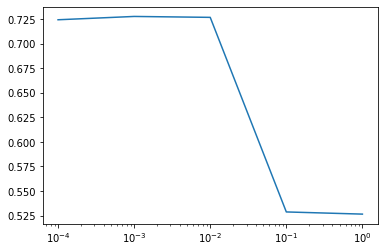

In [137]:
# Plot accuracy vs learning rate
lr_loss = []
lr_acc = []
for result in results:
    lr_loss.append(result[0])
    lr_acc.append(result[1])
    
f, ax = plt.subplots()
ax.plot(learning_rates_coarse, lr_acc)
ax.set_xscale("log")
f.show()

In [140]:
# Learning rate with highest accuracy betwen 0.0001 and 0.01
# Generate 6 random learning rates in this range
import numpy as np
bases = np.repeat(10, 3)
exponents_1 = -(np.random.rand(3) + 3) 
exponents_2 = -(np.random.rand(3) + 2) 
learning_rates_fine = np.power(bases, exponents_1).tolist() + np.power(bases, exponents_2).tolist()
learning_rates_fine

[0.0005935945876655383,
 0.00036595947272631936,
 0.0009123441839392998,
 0.0035296410462254623,
 0.0012155534202794767,
 0.005899656458741055]

In [141]:
results = []
cnt = 0
for rate in learning_rates_fine:
    print("Count:", cnt)
    result = build_train_test(learning_rate=rate)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
804/804 [==============================] - 1s 656us/step - loss: 0.6088 - accuracy: 0.6896
Epoch 2/100
804/804 [==============================] - 1s 675us/step - loss: 0.5537 - accuracy: 0.7309
Epoch 3/100
804/804 [==============================] - 1s 651us/step - loss: 0.5442 - accuracy: 0.7373
Epoch 4/100
804/804 [==============================] - 1s 647us/step - loss: 0.5477 - accuracy: 0.7305
Epoch 5/100
804/804 [==============================] - 1s 652us/step - loss: 0.5460 - accuracy: 0.7327
Epoch 6/100
804/804 [==============================] - 1s 651us/step - loss: 0.5464 - accuracy: 0.7299
Epoch 7/100
804/804 [==============================] - 1s 663us/step - loss: 0.5430 - accuracy: 0.7341
Epoch 8/100
804/804 [==============================] - 1s 653us/step - loss: 0.5490 - accuracy: 0.7303
Epoch 9/100
804/804 [==============================] - 1s 655us/step - loss: 0.5424 - accuracy: 0.7336
Epoch 10/100
804/804 [==============================] - 1s 650us

804/804 [==============================] - 1s 662us/step - loss: 0.5326 - accuracy: 0.7405
Epoch 58/100
804/804 [==============================] - 1s 654us/step - loss: 0.5319 - accuracy: 0.7385
Epoch 59/100
804/804 [==============================] - 1s 669us/step - loss: 0.5305 - accuracy: 0.7435
Epoch 60/100
804/804 [==============================] - 1s 649us/step - loss: 0.5297 - accuracy: 0.7434
Epoch 61/100
804/804 [==============================] - 1s 668us/step - loss: 0.5317 - accuracy: 0.7462
Epoch 62/100
804/804 [==============================] - 1s 672us/step - loss: 0.5309 - accuracy: 0.7383
Epoch 63/100
804/804 [==============================] - 1s 671us/step - loss: 0.5300 - accuracy: 0.7410
Epoch 64/100
804/804 [==============================] - 1s 666us/step - loss: 0.5300 - accuracy: 0.7428
Epoch 65/100
804/804 [==============================] - 1s 670us/step - loss: 0.5292 - accuracy: 0.7428
Epoch 66/100
804/804 [==============================] - 1s 667us/step - loss:

804/804 [==============================] - 1s 653us/step - loss: 0.5450 - accuracy: 0.7321
Epoch 14/100
804/804 [==============================] - 1s 653us/step - loss: 0.5381 - accuracy: 0.7408
Epoch 15/100
804/804 [==============================] - 1s 655us/step - loss: 0.5409 - accuracy: 0.7358
Epoch 16/100
804/804 [==============================] - 1s 653us/step - loss: 0.5353 - accuracy: 0.7425
Epoch 17/100
804/804 [==============================] - 1s 654us/step - loss: 0.5390 - accuracy: 0.7372
Epoch 18/100
804/804 [==============================] - 1s 654us/step - loss: 0.5441 - accuracy: 0.7349
Epoch 19/100
804/804 [==============================] - 1s 654us/step - loss: 0.5442 - accuracy: 0.7313
Epoch 20/100
804/804 [==============================] - 1s 650us/step - loss: 0.5409 - accuracy: 0.7371
Epoch 21/100
804/804 [==============================] - 1s 655us/step - loss: 0.5400 - accuracy: 0.7361
Epoch 22/100
804/804 [==============================] - 1s 653us/step - loss:

804/804 [==============================] - 1s 663us/step - loss: 0.5264 - accuracy: 0.7427
Epoch 70/100
804/804 [==============================] - 1s 656us/step - loss: 0.5348 - accuracy: 0.7377
Epoch 71/100
804/804 [==============================] - 1s 654us/step - loss: 0.5315 - accuracy: 0.7390
Epoch 72/100
804/804 [==============================] - 1s 657us/step - loss: 0.5323 - accuracy: 0.7395
Epoch 73/100
804/804 [==============================] - 1s 652us/step - loss: 0.5301 - accuracy: 0.7410
Epoch 74/100
804/804 [==============================] - 1s 653us/step - loss: 0.5283 - accuracy: 0.7420
Epoch 75/100
804/804 [==============================] - 1s 653us/step - loss: 0.5283 - accuracy: 0.7398
Epoch 76/100
804/804 [==============================] - 1s 653us/step - loss: 0.5303 - accuracy: 0.7389
Epoch 77/100
804/804 [==============================] - 1s 661us/step - loss: 0.5304 - accuracy: 0.7413
Epoch 78/100
804/804 [==============================] - 1s 656us/step - loss:

In [142]:
print_results("Learning Rates", learning_rates_fine, results)

Learning Rates
0.0005935945876655383
Model Loss: 0.5463894605636597
Model Accuracy: 0.7357434630393982

0.00036595947272631936
Model Loss: 0.5543255805969238
Model Accuracy: 0.7304956316947937

0.0009123441839392998
Model Loss: 0.5736032724380493
Model Accuracy: 0.7244315147399902

0.0035296410462254623
Model Loss: 0.6149201393127441
Model Accuracy: 0.7273469567298889

0.0012155534202794767
Model Loss: 0.5599614977836609
Model Accuracy: 0.7373760938644409

0.005899656458741055
Model Loss: 0.6066848635673523
Model Accuracy: 0.7254810333251953



#### Result: Learning Rate 0.0005935945876655383 yields second highest accuracy (0.737) and lowest loss (0.546)

### Combine Optimized Parameters

In [146]:
result = build_train_test(architecture=(80, 50, 30), activation="tanh",
                          learning_rate=0.0005935945876655383,
                          epochs=100, cat_cutoffs={"CLASSIFICATION": 1800})

Epoch 1/100
804/804 [==============================] - 1s 723us/step - loss: 0.5906 - accuracy: 0.7038
Epoch 2/100
804/804 [==============================] - 1s 721us/step - loss: 0.5601 - accuracy: 0.7283
Epoch 3/100
804/804 [==============================] - 1s 791us/step - loss: 0.5487 - accuracy: 0.7346
Epoch 4/100
804/804 [==============================] - 1s 723us/step - loss: 0.5430 - accuracy: 0.7349
Epoch 5/100
804/804 [==============================] - 1s 718us/step - loss: 0.5459 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 1s 732us/step - loss: 0.5437 - accuracy: 0.7342
Epoch 7/100
804/804 [==============================] - 1s 717us/step - loss: 0.5437 - accuracy: 0.7349
Epoch 8/100
804/804 [==============================] - 1s 721us/step - loss: 0.5352 - accuracy: 0.7387
Epoch 9/100
804/804 [==============================] - 1s 720us/step - loss: 0.5393 - accuracy: 0.7372
Epoch 10/100
804/804 [==============================] - 1s 708us/step - l

In [147]:
result

(0.5643726587295532, 0.7282798886299133)

#### Result: Roughly same as original model, accuracy decreased 0.729 to 0.728

In [162]:
# Vary Batch Size with Optimized Values
batch_sizes_coarse = [2**i for i in range(7)]

results = []
cnt = 0
for batch_size in batch_sizes_coarse:
    print("Count:", cnt)
    result = build_train_test(architecture=(80, 50, 30), activation="tanh",
                              learning_rate=0.0005935945876655383,
                              epochs=100, cat_cutoffs={"CLASSIFICATION": 1800},
                              batch_size=batch_size)
    results.append(result)
    cnt += 1

Count: 0
Epoch 1/100
25724/25724 [==============================] - 16s 603us/step - loss: 0.5873 - accuracy: 0.7014
Epoch 2/100
25724/25724 [==============================] - 15s 599us/step - loss: 0.5538 - accuracy: 0.7306
Epoch 3/100
25724/25724 [==============================] - 16s 605us/step - loss: 0.5559 - accuracy: 0.7286
Epoch 4/100
25724/25724 [==============================] - 16s 632us/step - loss: 0.5502 - accuracy: 0.7322
Epoch 5/100
25724/25724 [==============================] - 16s 614us/step - loss: 0.5514 - accuracy: 0.7294
Epoch 6/100
25724/25724 [==============================] - 16s 613us/step - loss: 0.5500 - accuracy: 0.7312
Epoch 7/100
25724/25724 [==============================] - 17s 650us/step - loss: 0.5443 - accuracy: 0.7343
Epoch 8/100
25724/25724 [==============================] - 16s 609us/step - loss: 0.5453 - accuracy: 0.7321
Epoch 9/100
25724/25724 [==============================] - 16s 608us/step - loss: 0.5440 - accuracy: 0.7375
Epoch 10/100
25724/

Epoch 76/100
25724/25724 [==============================] - 15s 581us/step - loss: 0.5301 - accuracy: 0.7429
Epoch 77/100
25724/25724 [==============================] - 15s 590us/step - loss: 0.5310 - accuracy: 0.7396
Epoch 78/100
25724/25724 [==============================] - 15s 583us/step - loss: 0.5342 - accuracy: 0.7384
Epoch 79/100
25724/25724 [==============================] - 15s 600us/step - loss: 0.5306 - accuracy: 0.7448
Epoch 80/100
25724/25724 [==============================] - 16s 617us/step - loss: 0.5394 - accuracy: 0.7356
Epoch 81/100
25724/25724 [==============================] - 16s 618us/step - loss: 0.5324 - accuracy: 0.7412
Epoch 82/100
25724/25724 [==============================] - 16s 632us/step - loss: 0.5350 - accuracy: 0.7389
Epoch 83/100
25724/25724 [==============================] - 17s 643us/step - loss: 0.5293 - accuracy: 0.7421
Epoch 84/100
25724/25724 [==============================] - 16s 638us/step - loss: 0.5354 - accuracy: 0.7418
Epoch 85/100
25724/

12862/12862 [==============================] - 8s 608us/step - loss: 0.5268 - accuracy: 0.7435
Epoch 52/100
12862/12862 [==============================] - 9s 703us/step - loss: 0.5278 - accuracy: 0.7445
Epoch 53/100
12862/12862 [==============================] - 8s 606us/step - loss: 0.5250 - accuracy: 0.7424
Epoch 54/100
12862/12862 [==============================] - 8s 599us/step - loss: 0.5323 - accuracy: 0.7397
Epoch 55/100
12862/12862 [==============================] - 8s 597us/step - loss: 0.5231 - accuracy: 0.7482
Epoch 56/100
12862/12862 [==============================] - 8s 593us/step - loss: 0.5333 - accuracy: 0.7381
Epoch 57/100
12862/12862 [==============================] - 8s 594us/step - loss: 0.5344 - accuracy: 0.7390
Epoch 58/100
12862/12862 [==============================] - 8s 595us/step - loss: 0.5317 - accuracy: 0.7382
Epoch 59/100
12862/12862 [==============================] - 8s 602us/step - loss: 0.5276 - accuracy: 0.7418
Epoch 60/100
12862/12862 [===============

6431/6431 [==============================] - 4s 614us/step - loss: 0.5292 - accuracy: 0.7429
Epoch 28/100
6431/6431 [==============================] - 4s 606us/step - loss: 0.5327 - accuracy: 0.7382
Epoch 29/100
6431/6431 [==============================] - 4s 624us/step - loss: 0.5288 - accuracy: 0.7457
Epoch 30/100
6431/6431 [==============================] - 4s 606us/step - loss: 0.5351 - accuracy: 0.7393
Epoch 31/100
6431/6431 [==============================] - 4s 631us/step - loss: 0.5252 - accuracy: 0.7436
Epoch 32/100
6431/6431 [==============================] - 4s 663us/step - loss: 0.5296 - accuracy: 0.7435
Epoch 33/100
6431/6431 [==============================] - 4s 631us/step - loss: 0.5296 - accuracy: 0.7399
Epoch 34/100
6431/6431 [==============================] - 4s 615us/step - loss: 0.5312 - accuracy: 0.7406
Epoch 35/100
6431/6431 [==============================] - 4s 607us/step - loss: 0.5272 - accuracy: 0.7438
Epoch 36/100
6431/6431 [==============================] - 4

3216/3216 [==============================] - 2s 687us/step - loss: 0.5273 - accuracy: 0.7400
Epoch 81/100
3216/3216 [==============================] - 2s 695us/step - loss: 0.5230 - accuracy: 0.7413
Epoch 82/100
3216/3216 [==============================] - 2s 701us/step - loss: 0.5299 - accuracy: 0.7389
Epoch 83/100
3216/3216 [==============================] - 2s 686us/step - loss: 0.5225 - accuracy: 0.7455
Epoch 84/100
3216/3216 [==============================] - 2s 691us/step - loss: 0.5234 - accuracy: 0.7447
Epoch 85/100
3216/3216 [==============================] - 2s 702us/step - loss: 0.5258 - accuracy: 0.7359
Epoch 86/100
3216/3216 [==============================] - 2s 705us/step - loss: 0.5255 - accuracy: 0.7407
Epoch 87/100
3216/3216 [==============================] - 2s 707us/step - loss: 0.5229 - accuracy: 0.7430
Epoch 88/100
3216/3216 [==============================] - 2s 703us/step - loss: 0.5284 - accuracy: 0.7425
Epoch 89/100
3216/3216 [==============================] - 2

Epoch 57/100
1608/1608 [==============================] - 1s 692us/step - loss: 0.5354 - accuracy: 0.7380
Epoch 58/100
1608/1608 [==============================] - 1s 685us/step - loss: 0.5275 - accuracy: 0.7395
Epoch 59/100
1608/1608 [==============================] - 1s 708us/step - loss: 0.5317 - accuracy: 0.7387
Epoch 60/100
1608/1608 [==============================] - 1s 733us/step - loss: 0.5307 - accuracy: 0.7400
Epoch 61/100
1608/1608 [==============================] - 1s 671us/step - loss: 0.5220 - accuracy: 0.7459
Epoch 62/100
1608/1608 [==============================] - 1s 658us/step - loss: 0.5244 - accuracy: 0.7458
Epoch 63/100
1608/1608 [==============================] - 1s 677us/step - loss: 0.5233 - accuracy: 0.7479
Epoch 64/100
1608/1608 [==============================] - 1s 690us/step - loss: 0.5267 - accuracy: 0.7411
Epoch 65/100
1608/1608 [==============================] - 1s 820us/step - loss: 0.5243 - accuracy: 0.7455
Epoch 66/100
1608/1608 [======================

402/402 [==============================] - 0s 756us/step - loss: 0.5382 - accuracy: 0.7372
Epoch 13/100
402/402 [==============================] - 0s 704us/step - loss: 0.5473 - accuracy: 0.7299
Epoch 14/100
402/402 [==============================] - 0s 714us/step - loss: 0.5362 - accuracy: 0.7398
Epoch 15/100
402/402 [==============================] - 0s 733us/step - loss: 0.5333 - accuracy: 0.7399
Epoch 16/100
402/402 [==============================] - 0s 725us/step - loss: 0.5410 - accuracy: 0.7339
Epoch 17/100
402/402 [==============================] - 0s 732us/step - loss: 0.5322 - accuracy: 0.7399
Epoch 18/100
402/402 [==============================] - 0s 728us/step - loss: 0.5386 - accuracy: 0.7354
Epoch 19/100
402/402 [==============================] - 0s 715us/step - loss: 0.5326 - accuracy: 0.7431
Epoch 20/100
402/402 [==============================] - 0s 704us/step - loss: 0.5377 - accuracy: 0.7347
Epoch 21/100
402/402 [==============================] - 0s 709us/step - loss:

In [166]:
print_results("Batch Sizes", batch_sizes_coarse, results)

Batch Sizes
1
Model Loss: 0.5532472133636475
Model Accuracy: 0.7331778407096863

2
Model Loss: 0.5493447184562683
Model Accuracy: 0.728863000869751

4
Model Loss: 0.5516465306282043
Model Accuracy: 0.7373760938644409

8
Model Loss: 0.564521312713623
Model Accuracy: 0.7334110736846924

16
Model Loss: 0.5474910140037537
Model Accuracy: 0.7367929816246033

32
Model Loss: 0.5550187230110168
Model Accuracy: 0.7337609529495239

64
Model Loss: 0.5582451224327087
Model Accuracy: 0.731195330619812



#### Result: Batch size of 16 generates second highest accuracy (0.737) and lowest loss (0.547)

### Summary

Best performing model had the following parameters:
- Three hidden layers with 80, 50, and 30 nodes
- `relu` activation function
- Learning rate = 0.001 (default)
- 100 epochs
- No bucketing of categorical variables
- Batch size = 32 (default)

Testing Set Performance:
- Accuracy: 0.740
- Loss: 0.561

#### Build, Train, Test, and Save Optimized Model

In [9]:
# Read data
application_df = pd.read_csv("Resources/charity_data.csv")

# Drop unnecessary identification columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Encode categorical columns without bucketing
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
# Drop redundant "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)

# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model: 3 hidden layers with 80, 50, and 30 nodes and relu activation function at inner layers
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn_optimized = tf.keras.models.Sequential()
# Input layer and first hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Third hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                9280      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                4050      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 14,891
Trainable params: 14,891
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Add model weight checkpoints during training
os.makedirs("checkpoints_optimized/", exist_ok=True)
checkpoint_path="checkpoints_optimized/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [14]:
# Train the model
fit_model_optimized = nn_optimized.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 710us/step - loss: 0.5952 - accuracy: 0.6998
Epoch 2/100
804/804 [==============================] - 1s 721us/step - loss: 0.5538 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 1s 708us/step - loss: 0.5467 - accuracy: 0.7316
Epoch 4/100
804/804 [==============================] - 1s 707us/step - loss: 0.5469 - accuracy: 0.7326
Epoch 5/100
804/804 [==============================] - 1s 706us/step - loss: 0.5470 - accuracy: 0.7305

Epoch 00005: saving model to checkpoints_optimized/weights.5.hdf5
Epoch 6/100
804/804 [==============================] - 1s 710us/step - loss: 0.5429 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 730us/step - loss: 0.5365 - accuracy: 0.7405
Epoch 8/100
804/804 [==============================] - 1s 724us/step - loss: 0.5401 - accuracy: 0.7353
Epoch 9/100
804/804 [==============================] - 1s 735us/step - loss: 0.5405 - accuracy: 0.7340
Epoch 

Epoch 71/100
804/804 [==============================] - 1s 726us/step - loss: 0.5272 - accuracy: 0.7419
Epoch 72/100
804/804 [==============================] - 1s 720us/step - loss: 0.5287 - accuracy: 0.7411
Epoch 73/100
804/804 [==============================] - 1s 723us/step - loss: 0.5230 - accuracy: 0.7471
Epoch 74/100
804/804 [==============================] - 1s 720us/step - loss: 0.5258 - accuracy: 0.7420
Epoch 75/100
804/804 [==============================] - 1s 736us/step - loss: 0.5247 - accuracy: 0.7476

Epoch 00075: saving model to checkpoints_optimized/weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 724us/step - loss: 0.5262 - accuracy: 0.7439
Epoch 77/100
804/804 [==============================] - 1s 717us/step - loss: 0.5259 - accuracy: 0.7437
Epoch 78/100
804/804 [==============================] - 1s 724us/step - loss: 0.5290 - accuracy: 0.7375
Epoch 79/100
804/804 [==============================] - 1s 719us/step - loss: 0.5202 - accuracy: 0.7

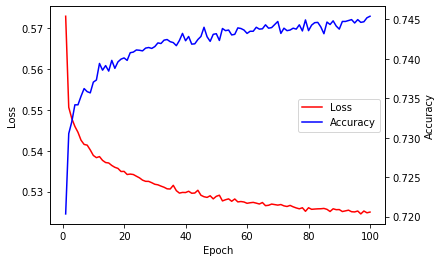

In [15]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model_optimized.history,
                          index=range(1, len(fit_model_optimized.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5832 - accuracy: 0.7268
Loss: 0.5831671357154846, Accuracy: 0.7267638444900513


In [17]:
# Export and save model to HDF5 file
nn_optimized.save("AlphabetSoupCharity_Optimization.h5")